# Customer Scheduling / Assignment
### To schedule family customers to Santa's Workshop in a way that minimizes the cost of the Workshop

## Part A. Import Libraries and Set Working Directory

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
from pyomo.environ import *
from pyomo.opt import SolverFactory
os.chdir(r"C:\Users\User\Desktop\BUS 730 - Prescriptive Modeling & Optimization for BA\Project")
%pprint

Pretty printing has been turned OFF


## Part B. Data Preparation

In [2]:
# load in family data 
familyData = pd.read_csv(open('family_data.csv','rb')) 
familyData.head()

family_id  choice_0  choice_1  choice_2  choice_3  choice_4  choice_5  \
0          0        52        38        12        82        33        75   
1          1        26         4        82         5        11        47   
2          2       100        54        25        12        27        82   
3          3         2        95         1        96        32         6   
4          4        53         1        47        93        26         3   

   choice_6  choice_7  choice_8  choice_9  n_people  
0        64        76        10        28         4  
1        38         6        66        61         4  
2        10        89        80        33         3  
3        40        31         9        59         2  
4        46        16        42        39         4

In [3]:
len(familyData) # 5000 families

5000

In [4]:
# converting top 10 preferences (choice 0 - choice 9) to a list of lists
choicePref = familyData.loc[:, 'choice_0':'choice_9'].values.tolist()
choicePref 
#len(choicePref[0])

[[52, 38, 12, 82, 33, 75, 64, 76, 10, 28], [26, 4, 82, 5, 11, 47, 38, 6, 66, 61], [100, 54, 25, 12, 27, 82, 10, 89, 80, 33], [2, 95, 1, 96, 32, 6, 40, 31, 9, 59], [53, 1, 47, 93, 26, 3, 46, 16, 42, 39], [32, 59, 12, 3, 60, 26, 35, 50, 5, 2], [88, 4, 1, 3, 91, 32, 39, 57, 28, 99], [25, 11, 52, 48, 10, 17, 88, 50, 95, 66], [18, 60, 1, 12, 89, 33, 16, 10, 53, 67], [1, 88, 39, 50, 26, 18, 96, 47, 46, 28], [96, 92, 8, 5, 67, 12, 57, 34, 80, 46], [19, 75, 39, 44, 2, 68, 53, 89, 7, 94], [52, 98, 53, 1, 39, 67, 87, 24, 65, 95], [54, 52, 25, 53, 1, 60, 10, 12, 11, 57], [45, 25, 34, 38, 88, 16, 1, 4, 89, 29], [22, 4, 82, 10, 5, 58, 75, 1, 18, 94], [46, 50, 1, 17, 52, 74, 7, 21, 38, 25], [47, 52, 74, 5, 4, 40, 79, 61, 10, 17], [75, 87, 74, 38, 52, 13, 10, 4, 81, 68], [3, 12, 5, 1, 7, 26, 49, 44, 97, 100], [3, 88, 17, 68, 32, 73, 25, 1, 59, 74], [56, 1, 45, 69, 31, 4, 80, 38, 81, 12], [61, 33, 1, 82, 60, 10, 92, 17, 73, 22], [19, 82, 18, 73, 11, 68, 3, 94, 59, 16], [75, 95, 24, 4, 38, 52, 3, 1, 28

In [5]:
# converting the number of people attending per family (n_people) to a list
n_people = familyData["n_people"].tolist()
n_people

[4, 4, 3, 2, 4, 4, 2, 5, 4, 7, 7, 7, 6, 2, 2, 2, 3, 4, 3, 2, 6, 5, 6, 3, 6, 3, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 6, 2, 5, 4, 6, 8, 8, 2, 2, 4, 3, 4, 4, 2, 6, 2, 2, 4, 3, 3, 5, 4, 4, 4, 2, 4, 6, 5, 3, 5, 8, 5, 7, 4, 3, 4, 3, 3, 4, 4, 4, 4, 5, 7, 2, 4, 4, 2, 6, 3, 3, 2, 4, 2, 6, 4, 2, 3, 3, 4, 6, 4, 4, 3, 6, 2, 7, 7, 2, 4, 4, 3, 5, 5, 6, 4, 3, 4, 6, 4, 4, 6, 4, 4, 4, 3, 6, 4, 5, 3, 5, 8, 6, 7, 6, 4, 2, 4, 8, 6, 3, 2, 5, 3, 6, 4, 3, 3, 4, 2, 3, 5, 4, 4, 4, 6, 2, 2, 4, 2, 5, 3, 6, 6, 2, 4, 5, 4, 6, 7, 4, 4, 4, 5, 7, 4, 7, 3, 6, 2, 6, 4, 2, 5, 6, 3, 2, 3, 6, 2, 4, 2, 3, 3, 4, 3, 3, 4, 2, 3, 6, 2, 7, 2, 2, 7, 5, 4, 5, 2, 2, 5, 4, 6, 4, 4, 3, 3, 3, 2, 7, 5, 3, 6, 2, 5, 3, 6, 4, 2, 2, 5, 7, 4, 2, 3, 3, 3, 4, 3, 5, 7, 4, 3, 4, 4, 2, 4, 4, 6, 6, 6, 5, 3, 8, 3, 4, 3, 3, 4, 4, 6, 4, 5, 5, 3, 4, 3, 2, 7, 7, 2, 4, 5, 6, 6, 6, 2, 3, 6, 4, 3, 3, 6, 6, 3, 3, 4, 6, 6, 4, 4, 2, 3, 5, 2, 3, 5, 7, 8, 3, 3, 3, 3, 4, 2, 4, 3, 6, 5, 6, 4, 4, 4, 3, 2, 2, 5, 3, 4, 5, 3, 4, 5, 5, 5, 4, 4, 3, 2, 4, 4, 3, 3, 3, 4, 2, 

In [6]:
# Calculate preference cost for "family" under each choice

def getPreferenceCost(choice, n_people):
    if choice == 0:
        PreferenceCost = 0
    elif choice == 1:
        PreferenceCost = 50
    elif choice == 2:
        PreferenceCost = 50 + (9*n_people)
    elif choice == 3:
        PreferenceCost = 100 + (9*n_people)
    elif choice == 4:
        PreferenceCost = 200 + (9*n_people)
    elif choice == 5:
        PreferenceCost = 200 + (18*n_people)
    elif choice == 6:
        PreferenceCost = 300 + (18*n_people)
    elif choice == 7:
        PreferenceCost = 300 + (36*n_people)
    elif choice == 8:
        PreferenceCost = 400 + (36*n_people)
    elif choice == 9:
        PreferenceCost = 500 + ((36+199)*n_people)
    else:
        PreferenceCost = 500 + ((36+398)*n_people)    
    return PreferenceCost

### Preference Cost Matrix

In [7]:
# Calculate "preference cost" by days per family 

n_family = len(familyData)    # number of families
n_assignedday = 100           # number of days before Christmas
n_choice = len(choicePref[0]) # number of choices

# f refers to the family_id
# d refers to the assigned day
# c refers to the choice

# Create preference cost matrix by days per family (n_family * n_assignedday)

prefCost_matrix = [[] for f in range(n_family)]  # empty list of lists

for f in range(n_family):  # per family
    peopleInFamily = n_people[f]  # number of people in that family    
    
    for d in range(n_assignedday):  # per assigned day
        # initialize all preference cost for each day = other choice preference cost
        prefCost_matrix[f].append(getPreferenceCost(10, peopleInFamily))  
    
    for c in range(n_choice):        
        choice_day = choicePref[f][c]  # choice preference day        
        prefCost_matrix[f][choice_day-1] = getPreferenceCost(c, peopleInFamily)  # change preference cost for that choice day

prefCost_matrix

[[2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 544, 2236, 86, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 1440, 2236, 2236, 2236, 2236, 236, 2236, 2236, 2236, 2236, 50, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 0, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 372, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 272, 444, 2236, 2236, 2236, 2236, 2236, 136, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236], [2236, 2236, 2236, 50, 136, 444, 2236, 2236, 2236, 2236, 236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 0, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 372, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 272, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 2236, 1440, 2236, 2236, 2236, 2236, 544, 2236, 2236, 2236, 2236, 

In [8]:
# For visualization: prefCost_matrix data frame
assigneddayList = list(range(1, n_assignedday+1))
df_prefCost_matrix = pd.DataFrame(prefCost_matrix, columns = assigneddayList)
df_prefCost_matrix

1     2     3     4     5     6     7     8     9     10   ...   91   \
0     2236  2236  2236  2236  2236  2236  2236  2236  2236   544  ...  2236   
1     2236  2236  2236    50   136   444  2236  2236  2236  2236  ...  2236   
2     1802  1802  1802  1802  1802  1802  1802  1802  1802   354  ...  1802   
3       68     0  1368  1368  1368   236  1368  1368   472  1368  ...  1368   
4       50  2236   272  2236  2236  2236  2236  2236  2236  2236  ...  2236   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4995    50  2236  2236  2236  2236  2236  2236  2236  2236  2236  ...  2236   
4996  1368  1368  1368  1368  1368  1368  1368  1368  1368  1368  ...   372   
4997  3104  3104   616  3104  3104  3104  1910  3104  3104  3104  ...  3104   
4998   390  2670  2670    95  2670  2670  2670  2670  2670  2670  ...  2670   
4999  2236  2236  2236  2236  2236  2236  2236  2236  2236  2236  ...  2236   

       92    93    94    95    96    97    98    99    100  
0     2236  2236  2236  2236  2236  2236  2236  2236  2236  
1     2236  2236  2236  2236  2236  2236  2236  2236  2236  
2     1802  1802  1802  1802  1802  1802  1802  1802     0  
3     1368  1368  1368    50   118  1368  1368  1368  1368  
4     2236   136  2236  2236  2236  2236  2236  2236  2236  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
4995  2236  2236  2236  2236  2236  2236  2236  2236  2236  
4996  1368  1368  1368  1368  1368  1368  1368  1368  1368  
4997  3104  3104  3104  3104  3104  3104  3104  3104  3104  
4998    50  2670  2670  2670  2670  2670  2670  2670  2670  
4999  2236  2236  2236  2236   372  2236  2236  2236  2236  

[5000 rows x 100 columns]

### Accounting Penalty Matrix (all possible combinations)

In [9]:
# Calculate "accounting penalty" for all possible combinations of current day occupancy and previous day occupancy 

# total number of people (occupancy) attending the workshop each day must be between 125 - 300
min_occupancy = 125 
max_occupancy = 300 
range_occupancy = range(min_occupancy, max_occupancy+1)  # occupancy possibilities (176)

# n_d refers to the current day occupancy
# n_d1 refers to the previous day occupancy

# Create accounting penalty calculation matrix (current day occupancy * previous day occupancy)

accPenalty_matrix = [[] for n_d in range_occupancy]  # empty list of lists

for n_d in range_occupancy:  # per current day occupancy
    for n_d1 in range_occupancy:  # per previous day occupancy       
        accounting_penalty = (n_d-125)/400 * (n_d**(0.5+(abs(n_d-n_d1)/50)))  # accounting penalty equation 
        accPenalty_matrix[n_d-min_occupancy].append(accounting_penalty)       # put in the accounting penalty matrix
    
accPenalty_matrix   # 176*176 (current day occupancy * previous day occupancy)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.030912397699621216, 0.028062430400804562, 0.030912397699621216, 0.03405180228125039, 0.03751003884812137, 0.041319

In [10]:
# For visualization: accPenalty_matrix data frame
occupancyList = list(range(min_occupancy, max_occupancy+1))
df_accPenalty_matrix = pd.DataFrame(accPenalty_matrix, columns = occupancyList)
df_accPenalty_matrix

125           126           127           128           129  \
0    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1    3.091240e-02  2.806243e-02  3.091240e-02  3.405180e-02  3.751004e-02   
2    6.839495e-02  6.207946e-02  5.634714e-02  6.207946e-02  6.839495e-02   
3    1.135269e-01  1.030279e-01  9.349975e-02  8.485281e-02  9.349975e-02   
4    1.675491e-01  1.520303e-01  1.379490e-01  1.251718e-01  1.135782e-01   
..            ...           ...           ...           ...           ...   
171  2.081611e+09  1.857692e+09  1.657860e+09  1.479524e+09  1.320372e+09   
172  2.377546e+09  2.121650e+09  1.893296e+09  1.689521e+09  1.507677e+09   
173  2.715705e+09  2.423250e+09  2.162290e+09  1.929432e+09  1.721651e+09   
174  3.102134e+09  2.767879e+09  2.469641e+09  2.203537e+09  1.966106e+09   
175  3.543750e+09  3.161700e+09  2.820839e+09  2.516725e+09  2.245398e+09   

              130           131           132           133           134  \
0    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1    4.131949e-02  4.551582e-02  5.013832e-02  5.523027e-02  6.083935e-02   
2    7.535292e-02  8.301874e-02  9.146443e-02  1.007693e-01  1.110208e-01   
3    1.030279e-01  1.135269e-01  1.250959e-01  1.378438e-01  1.518908e-01   
4    1.251718e-01  1.379490e-01  1.520303e-01  1.675491e-01  1.846519e-01   
..            ...           ...           ...           ...           ...   
171  1.178340e+09  1.051586e+09  9.384665e+08  8.375157e+08  7.474241e+08   
172  1.345406e+09  1.200599e+09  1.071379e+09  9.560659e+08  8.531644e+08   
173  1.536246e+09  1.370808e+09  1.223185e+09  1.091460e+09  9.739207e+08   
174  1.754258e+09  1.565237e+09  1.396583e+09  1.246101e+09  1.111834e+09   
175  2.003323e+09  1.787346e+09  1.594653e+09  1.422734e+09  1.269350e+09   

     ...            291            292            293           294  \
0    ...       0.000000       0.000000       0.000000  0.000000e+00   
1    ...  239523.472982  263849.023391  290645.030641  3.201624e+05   
2    ...  448072.272202  493655.686365  543876.405212  5.992062e+05   
3    ...  628305.337750  692332.865999  762885.126934  8.406270e+05   
4    ...  782718.351815  862615.605624  950668.502074  1.047710e+06   
..   ...            ...            ...            ...           ...   
171  ...      12.993051      11.595389      10.348073  9.234931e+00   
172  ...      14.674978      13.095507      11.686035  1.042827e+01   
173  ...      16.576183      14.791091      13.198235  1.177692e+01   
174  ...      18.725449      16.707783      14.907520  1.330124e+01   
175  ...      21.155364      18.874614      16.839751  1.502427e+01   

              295           296           297           298           299  \
0    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1    3.526775e+05  3.884947e+05  4.279495e+05  4.714113e+05  5.192869e+05   
2    6.601648e+05  7.273249e+05  8.013173e+05  8.828371e+05  9.726502e+05   
3    9.262912e+05  1.020685e+06  1.124698e+06  1.239311e+06  1.365603e+06   
4    1.154656e+06  1.272520e+06  1.402414e+06  1.545568e+06  1.703334e+06   
..            ...           ...           ...           ...           ...   
171  8.241529e+00  7.354988e+00  8.241529e+00  9.234931e+00  1.034807e+01   
172  9.305869e+00  8.304277e+00  7.410486e+00  8.304277e+00  9.305869e+00   
173  1.050866e+01  9.376978e+00  8.367170e+00  7.466108e+00  8.367170e+00   
174  1.186803e+01  1.058925e+01  9.448257e+00  8.430208e+00  7.521853e+00   
175  1.340451e+01  1.195937e+01  1.067004e+01  9.519706e+00  8.493391e+00   

              300  
0    0.000000e+00  
1    5.720247e+05  
2    1.071600e+06  
3    1.504765e+06  
4    1.877205e+06  
..            ...  
171  1.159539e+01  
172  1.042827e+01  
173  9.376978e+00  
174  8.430208e+00  
175  7.577722e+00  

[176 rows x 176 columns]

## Part C. Model 1 - Let's try to minimize "Preference Cost" first

In [11]:
# declare a concrete model
model = ConcreteModel()

# declare the decision variables: Whether family assigned to that day?
model.x = Var(range(n_family), range(n_assignedday), domain = Binary) # (n_family * n_assignedday)

# f refers to the family_id
# d refers to the assigned day
# c refers to the choice

# specify the objective: Minimize preference cost 
model.Objective = Objective(expr = sum(model.x[f,d]*prefCost_matrix[f][d] for f in range(n_family) for d in range(n_assignedday)), 
                            sense= minimize) 


# Constraint: Every family must be scheduled for one and only one assigned day
model.OneAssignedDay =  ConstraintList() 
for f in range(n_family): # for each family
    model.OneAssignedDay.add(expr = sum(model.x[f,d] for d in range(n_assignedday)) == 1)

# Constraint: The total number of people attending the workshop each day must be between 125 - 300

# lower bound occupancy constraint
model.OccupancyMin =  ConstraintList() 
for d in range(n_assignedday): # for each assigned day
    model.OccupancyMin.add(expr = sum(model.x[f,d]*n_people[f] for f in range(n_family)) >= min_occupancy)

# upper bound occupancy constraint
model.OccupancyMax =  ConstraintList() 
for d in range(n_assignedday): # for each assigned day
    model.OccupancyMax.add(expr = sum(model.x[f,d]*n_people[f] for f in range(n_family)) <= max_occupancy)

# specify the solver and solve
opt = SolverFactory('glpk')
opt.options["tmlim"] = 10000
results = opt.solve(model, tee = True)  

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --tmlim 10000 --write C:\Users\User\AppData\Local\Temp\tmpjbh50c9v.glpk.raw
 --wglp C:\Users\User\AppData\Local\Temp\tmphj2zs42a.glpk.glp --cpxlp C:\Users\User\AppData\Local\Temp\tmp5jlek0yg.pyomo.lp
Reading problem data from 'C:\Users\User\AppData\Local\Temp\tmp5jlek0yg.pyomo.lp'...
C:\Users\User\AppData\Local\Temp\tmp5jlek0yg.pyomo.lp:2510613: warning: lower bound of variable 'x1' redefined
C:\Users\User\AppData\Local\Temp\tmp5jlek0yg.pyomo.lp:2510613: warning: upper bound of variable 'x1' redefined
5201 rows, 500001 columns, 1500001 non-zeros
500000 integer variables, all of which are binary
3010613 lines were read
Writing problem data to 'C:\Users\User\AppData\Local\Temp\tmphj2zs42a.glpk.glp'...
2505408 lines were written
GLPK Integer Optimizer, v4.65
5201 rows, 500001 columns, 1500001 non-zeros
500000 integer variables, all of which are binary
Preprocessing...
5200 rows, 500000 columns, 1500000 non-zero

+  4992: mip =     not found yet >=   4.329400000e+04        (270; 0)
+  5037: mip =     not found yet >=   4.329400000e+04        (273; 0)
+  5058: mip =     not found yet >=   4.329400000e+04        (276; 0)
+  5062: mip =     not found yet >=   4.329400000e+04        (280; 0)
+  5072: mip =     not found yet >=   4.329400000e+04        (284; 0)
+  5084: mip =     not found yet >=   4.329400000e+04        (288; 0)
Time used: 548.9 secs.  Memory used: 404.6 Mb.
+  5093: mip =     not found yet >=   4.329400000e+04        (292; 0)
+  5108: mip =     not found yet >=   4.329400000e+04        (296; 0)
+  5113: mip =     not found yet >=   4.329400000e+04        (300; 0)
+  5117: mip =     not found yet >=   4.329400000e+04        (304; 0)
+  5123: mip =     not found yet >=   4.329400000e+04        (307; 0)
+  5128: mip =     not found yet >=   4.329400000e+04        (310; 0)
+  5133: mip =     not found yet >=   4.329400000e+04        (314; 0)
+  5148: mip =     not found yet >=   4.329

+  6026: mip =     not found yet >=   4.329400000e+04        (709; 0)
+  6051: mip =     not found yet >=   4.329400000e+04        (713; 0)
+  6061: mip =     not found yet >=   4.329400000e+04        (718; 0)
+  6066: mip =     not found yet >=   4.329400000e+04        (723; 0)
+  6080: mip =     not found yet >=   4.329400000e+04        (728; 0)
+  6093: mip =     not found yet >=   4.329400000e+04        (732; 0)
+  6101: mip =     not found yet >=   4.329400000e+04        (737; 0)
+  6108: mip =     not found yet >=   4.329400000e+04        (742; 0)
+  6116: mip =     not found yet >=   4.329400000e+04        (746; 0)
Time used: 1215.6 secs.  Memory used: 405.7 Mb.
+  6133: mip =     not found yet >=   4.329400000e+04        (751; 0)
+  6142: mip =     not found yet >=   4.329400000e+04        (756; 0)
+  6153: mip =     not found yet >=   4.329400000e+04        (761; 0)
+  6158: mip =     not found yet >=   4.329400000e+04        (766; 0)
+  6163: mip =     not found yet >=   4.32

+  6878: mip =     not found yet >=   4.329400000e+04        (1260; 0)
+  6883: mip =     not found yet >=   4.329400000e+04        (1265; 0)
+  6888: mip =     not found yet >=   4.329400000e+04        (1270; 0)
+  6893: mip =     not found yet >=   4.329400000e+04        (1275; 0)
+  6898: mip =     not found yet >=   4.329400000e+04        (1280; 0)
+  6903: mip =     not found yet >=   4.329400000e+04        (1285; 0)
+  6908: mip =     not found yet >=   4.329400000e+04        (1290; 0)
+  6913: mip =     not found yet >=   4.329400000e+04        (1295; 0)
+  6918: mip =     not found yet >=   4.329400000e+04        (1300; 0)
+  6923: mip =     not found yet >=   4.329400000e+04        (1305; 0)
Time used: 1821.1 secs.  Memory used: 406.1 Mb.
+  6928: mip =     not found yet >=   4.329400000e+04        (1310; 0)
+  6933: mip =     not found yet >=   4.329400000e+04        (1315; 0)
+  6938: mip =     not found yet >=   4.329400000e+04        (1320; 0)
+  6943: mip =     not found 

+  7480: mip =     not found yet >=   4.329400000e+04        (1811; 0)
+  7485: mip =     not found yet >=   4.329400000e+04        (1816; 0)
+  7490: mip =     not found yet >=   4.329400000e+04        (1821; 0)
+  7495: mip =     not found yet >=   4.329400000e+04        (1826; 0)
Time used: 2367.7 secs.  Memory used: 406.3 Mb.
+  7499: mip =     not found yet >=   4.329400000e+04        (1830; 0)
+  7504: mip =     not found yet >=   4.329400000e+04        (1835; 0)
+  7509: mip =     not found yet >=   4.329400000e+04        (1840; 0)
+  7514: mip =     not found yet >=   4.329400000e+04        (1845; 0)
+  7519: mip =     not found yet >=   4.329400000e+04        (1850; 0)
+  7524: mip =     not found yet >=   4.329400000e+04        (1855; 0)
+  7529: mip =     not found yet >=   4.329400000e+04        (1860; 0)
+  7534: mip =     not found yet >=   4.329400000e+04        (1865; 0)
+  7539: mip =     not found yet >=   4.329400000e+04        (1870; 0)
+  7544: mip =     not found 

+  8024: mip =     not found yet >=   4.329400000e+04        (2355; 0)
+  8029: mip =     not found yet >=   4.329400000e+04        (2360; 0)
+  8034: mip =     not found yet >=   4.329400000e+04        (2365; 0)
+  8039: mip =     not found yet >=   4.329400000e+04        (2370; 0)
+  8044: mip =     not found yet >=   4.329400000e+04        (2375; 0)
+  8049: mip =     not found yet >=   4.329400000e+04        (2380; 0)
+  8054: mip =     not found yet >=   4.329400000e+04        (2385; 0)
+  8059: mip =     not found yet >=   4.329400000e+04        (2390; 0)
+  8064: mip =     not found yet >=   4.329400000e+04        (2395; 0)
Time used: 2973.0 secs.  Memory used: 406.5 Mb.
+  8069: mip =     not found yet >=   4.329400000e+04        (2400; 0)
+  8074: mip =     not found yet >=   4.329400000e+04        (2405; 0)
+  8079: mip =     not found yet >=   4.329400000e+04        (2410; 0)
+  8084: mip =     not found yet >=   4.329400000e+04        (2415; 0)
+  8089: mip =     not found 

+  8574: mip =     not found yet >=   4.329400000e+04        (2905; 0)
+  8579: mip =     not found yet >=   4.329400000e+04        (2910; 0)
Time used: 3516.9 secs.  Memory used: 406.7 Mb.
+  8584: mip =     not found yet >=   4.329400000e+04        (2915; 0)
+  8589: mip =     not found yet >=   4.329400000e+04        (2920; 0)
+  8594: mip =     not found yet >=   4.329400000e+04        (2925; 0)
+  8599: mip =     not found yet >=   4.329400000e+04        (2930; 0)
+  8604: mip =     not found yet >=   4.329400000e+04        (2935; 0)
+  8609: mip =     not found yet >=   4.329400000e+04        (2940; 0)
+  8614: mip =     not found yet >=   4.329400000e+04        (2945; 0)
+  8619: mip =     not found yet >=   4.329400000e+04        (2950; 0)
+  8624: mip =     not found yet >=   4.329400000e+04        (2955; 0)
+  8629: mip =     not found yet >=   4.329400000e+04        (2960; 0)
+  8634: mip =     not found yet >=   4.329400000e+04        (2965; 0)
+  8639: mip =     not found 

+  9121: mip =     not found yet >=   4.329400000e+04        (3452; 0)
+  9126: mip =     not found yet >=   4.329400000e+04        (3457; 0)
+  9131: mip =     not found yet >=   4.329400000e+04        (3462; 0)
+  9136: mip =     not found yet >=   4.329400000e+04        (3467; 0)
+  9141: mip =     not found yet >=   4.329400000e+04        (3472; 0)
+  9146: mip =     not found yet >=   4.329400000e+04        (3477; 0)
+  9151: mip =     not found yet >=   4.329400000e+04        (3482; 0)
+  9156: mip =     not found yet >=   4.329400000e+04        (3487; 0)
Time used: 4122.3 secs.  Memory used: 406.9 Mb.
+  9161: mip =     not found yet >=   4.329400000e+04        (3492; 0)
+  9166: mip =     not found yet >=   4.329400000e+04        (3497; 0)
+  9171: mip =     not found yet >=   4.329400000e+04        (3502; 0)
+  9176: mip =     not found yet >=   4.329400000e+04        (3507; 0)
+  9181: mip =     not found yet >=   4.329400000e+04        (3512; 0)
+  9186: mip =     not found 

+  9671: mip =     not found yet >=   4.329400000e+04        (4002; 0)
+  9676: mip =     not found yet >=   4.329400000e+04        (4007; 0)
Time used: 4669.3 secs.  Memory used: 407.1 Mb.
+  9681: mip =     not found yet >=   4.329400000e+04        (4012; 0)
+  9686: mip =     not found yet >=   4.329400000e+04        (4017; 0)
+  9691: mip =     not found yet >=   4.329400000e+04        (4022; 0)
+  9696: mip =     not found yet >=   4.329400000e+04        (4027; 0)
+  9701: mip =     not found yet >=   4.329400000e+04        (4032; 0)
+  9706: mip =     not found yet >=   4.329400000e+04        (4037; 0)
+  9711: mip =     not found yet >=   4.329400000e+04        (4042; 0)
+  9716: mip =     not found yet >=   4.329400000e+04        (4047; 0)
+  9721: mip =     not found yet >=   4.329400000e+04        (4052; 0)
+  9726: mip =     not found yet >=   4.329400000e+04        (4057; 0)
+  9731: mip =     not found yet >=   4.329400000e+04        (4062; 0)
Time used: 4730.4 secs.  Memo

+ 10216: mip =     not found yet >=   4.329400000e+04        (4547; 0)
+ 10221: mip =     not found yet >=   4.329400000e+04        (4552; 0)
+ 10226: mip =     not found yet >=   4.329400000e+04        (4557; 0)
+ 10231: mip =     not found yet >=   4.329400000e+04        (4562; 0)
+ 10236: mip =     not found yet >=   4.329400000e+04        (4567; 0)
+ 10241: mip =     not found yet >=   4.329400000e+04        (4572; 0)
+ 10246: mip =     not found yet >=   4.329400000e+04        (4577; 0)
Time used: 5273.7 secs.  Memory used: 407.3 Mb.
+ 10251: mip =     not found yet >=   4.329400000e+04        (4582; 0)
+ 10256: mip =     not found yet >=   4.329400000e+04        (4587; 0)
+ 10261: mip =     not found yet >=   4.329400000e+04        (4592; 0)
+ 10266: mip =     not found yet >=   4.329400000e+04        (4597; 0)
+ 10271: mip =     not found yet >=   4.329400000e+04        (4602; 0)
+ 10276: mip =     not found yet >=   4.329400000e+04        (4607; 0)
+ 10282: mip =     not found 

+ 10764: mip =     not found yet >=   4.329400000e+04        (5095; 0)
+ 10769: mip =     not found yet >=   4.329400000e+04        (5100; 0)
+ 10774: mip =     not found yet >=   4.329400000e+04        (5105; 0)
+ 10779: mip =     not found yet >=   4.329400000e+04        (5110; 0)
+ 10784: mip =     not found yet >=   4.329400000e+04        (5115; 0)
+ 10789: mip =     not found yet >=   4.329400000e+04        (5120; 0)
+ 10794: mip =     not found yet >=   4.329400000e+04        (5125; 0)
+ 10799: mip =     not found yet >=   4.329400000e+04        (5130; 0)
+ 10804: mip =     not found yet >=   4.329400000e+04        (5135; 0)
+ 10809: mip =     not found yet >=   4.329400000e+04        (5140; 0)
+ 10814: mip =     not found yet >=   4.329400000e+04        (5145; 0)
+ 10819: mip =     not found yet >=   4.329400000e+04        (5150; 0)
Time used: 5878.3 secs.  Memory used: 407.7 Mb.
+ 10824: mip =     not found yet >=   4.329400000e+04        (5155; 0)
+ 10829: mip =     not found 

+ 11314: mip =     not found yet >=   4.329400000e+04        (5645; 0)
+ 11319: mip =     not found yet >=   4.329400000e+04        (5650; 0)
+ 11324: mip =     not found yet >=   4.329400000e+04        (5655; 0)
+ 11329: mip =     not found yet >=   4.329400000e+04        (5660; 0)
+ 11334: mip =     not found yet >=   4.329400000e+04        (5665; 0)
+ 11339: mip =     not found yet >=   4.329400000e+04        (5670; 0)
Time used: 6424.2 secs.  Memory used: 407.9 Mb.
+ 11344: mip =     not found yet >=   4.329400000e+04        (5675; 0)
+ 11349: mip =     not found yet >=   4.329400000e+04        (5680; 0)
+ 11354: mip =     not found yet >=   4.329400000e+04        (5685; 0)
+ 11359: mip =     not found yet >=   4.329400000e+04        (5690; 0)
+ 11364: mip =     not found yet >=   4.329400000e+04        (5695; 0)
+ 11369: mip =     not found yet >=   4.329400000e+04        (5700; 0)
+ 11374: mip =     not found yet >=   4.329400000e+04        (5705; 0)
+ 11379: mip =     not found 

Time used: 6970.1 secs.  Memory used: 408.1 Mb.
+ 11864: mip =     not found yet >=   4.329400000e+04        (6195; 0)
+ 11869: mip =     not found yet >=   4.329400000e+04        (6200; 0)
+ 11874: mip =     not found yet >=   4.329400000e+04        (6205; 0)
+ 11879: mip =     not found yet >=   4.329400000e+04        (6210; 0)
+ 11884: mip =     not found yet >=   4.329400000e+04        (6215; 0)
+ 11889: mip =     not found yet >=   4.329400000e+04        (6220; 0)
+ 11894: mip =     not found yet >=   4.329400000e+04        (6225; 0)
+ 11899: mip =     not found yet >=   4.329400000e+04        (6230; 0)
+ 11904: mip =     not found yet >=   4.329400000e+04        (6235; 0)
+ 11909: mip =     not found yet >=   4.329400000e+04        (6240; 0)
+ 11914: mip =     not found yet >=   4.329400000e+04        (6245; 0)
+ 11919: mip =     not found yet >=   4.329400000e+04        (6250; 0)
Time used: 7030.2 secs.  Memory used: 408.1 Mb.
+ 11924: mip =     not found yet >=   4.329400000e+0

+ 12414: mip =     not found yet >=   4.329400000e+04        (6745; 0)
+ 12419: mip =     not found yet >=   4.329400000e+04        (6750; 0)
+ 12424: mip =     not found yet >=   4.329400000e+04        (6755; 0)
+ 12429: mip =     not found yet >=   4.329400000e+04        (6760; 0)
Time used: 7575.1 secs.  Memory used: 408.3 Mb.
+ 12434: mip =     not found yet >=   4.329400000e+04        (6765; 0)
+ 12439: mip =     not found yet >=   4.329400000e+04        (6770; 0)
+ 12444: mip =     not found yet >=   4.329400000e+04        (6775; 0)
+ 12449: mip =     not found yet >=   4.329400000e+04        (6780; 0)
+ 12454: mip =     not found yet >=   4.329400000e+04        (6785; 0)
+ 12459: mip =     not found yet >=   4.329400000e+04        (6790; 0)
+ 12464: mip =     not found yet >=   4.329400000e+04        (6795; 0)
+ 12469: mip =     not found yet >=   4.329400000e+04        (6800; 0)
+ 12474: mip =     not found yet >=   4.329400000e+04        (6805; 0)
+ 12479: mip =     not found 

+ 12959: mip =     not found yet >=   4.329400000e+04        (7290; 0)
+ 12964: mip =     not found yet >=   4.329400000e+04        (7295; 0)
+ 12969: mip =     not found yet >=   4.329400000e+04        (7300; 0)
+ 12974: mip =     not found yet >=   4.329400000e+04        (7305; 0)
+ 12979: mip =     not found yet >=   4.329400000e+04        (7310; 0)
+ 12984: mip =     not found yet >=   4.329400000e+04        (7315; 0)
+ 12989: mip =     not found yet >=   4.329400000e+04        (7320; 0)
+ 12994: mip =     not found yet >=   4.329400000e+04        (7325; 0)
+ 12999: mip =     not found yet >=   4.329400000e+04        (7330; 0)
+ 13004: mip =     not found yet >=   4.329400000e+04        (7335; 0)
+ 13009: mip =     not found yet >=   4.329400000e+04        (7340; 0)
Time used: 8180.7 secs.  Memory used: 408.5 Mb.
+ 13014: mip =     not found yet >=   4.329400000e+04        (7345; 0)
+ 13019: mip =     not found yet >=   4.329400000e+04        (7350; 0)
+ 13024: mip =     not found 

+ 13688: mip =     not found yet >=   4.329400000e+04        (7838; 0)
+ 13694: mip =     not found yet >=   4.329400000e+04        (7843; 0)
Time used: 8725.2 secs.  Memory used: 409.0 Mb.
+ 13719: mip =     not found yet >=   4.329400000e+04        (7848; 0)
+ 13739: mip =     not found yet >=   4.329400000e+04        (7853; 0)
+ 13747: mip =     not found yet >=   4.329400000e+04        (7858; 0)
+ 13755: mip =     not found yet >=   4.329400000e+04        (7863; 0)
+ 13768: mip =     not found yet >=   4.329400000e+04        (7868; 0)
+ 13776: mip =     not found yet >=   4.329400000e+04        (7872; 0)
+ 13781: mip =     not found yet >=   4.329400000e+04        (7877; 0)
+ 13786: mip =     not found yet >=   4.329400000e+04        (7882; 0)
+ 13800: mip =     not found yet >=   4.329400000e+04        (7887; 0)
+ 13809: mip =     not found yet >=   4.329400000e+04        (7892; 0)
Time used: 8786.1 secs.  Memory used: 409.1 Mb.
+ 13815: mip =     not found yet >=   4.329400000e+0

+ 14978: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8163; 201)
+ 14982: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8166; 201)
+ 15000: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8169; 201)
+ 15012: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8172; 201)
+ 15023: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8175; 201)
+ 15027: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8178; 201)
+ 15031: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8181; 201)
+ 15041: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8184; 201)
+ 15050: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8187; 201)
Time used: 9392.2 secs.  Memory used: 433.9 Mb.
+ 15059: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8190; 201)
+ 15065: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8193; 201)
+ 15070: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8196; 201)
+ 15078: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8199; 201)
+ 1

+ 15787: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8517; 201)
+ 15797: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8521; 201)
+ 15804: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8525; 201)
+ 15820: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8529; 201)
+ 15824: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8533; 201)
+ 15829: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8537; 201)
+ 15835: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8541; 201)
+ 15849: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8545; 201)
+ 15855: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8549; 201)
+ 15856: mip =   4.891800000e+04 >=   4.329500000e+04  11.5% (8550; 201)
TIME LIMIT EXCEEDED; SEARCH TERMINATED
Time used:   10028.7 secs
Memory used: 524.4 Mb (549920482 bytes)
Writing MIP solution to 'C:\Users\User\AppData\Local\Temp\tmpjbh50c9v.glpk.raw'...
505211 lines were written


In [12]:
# print the solution

# Total preference cost 
print("Total preference cost:", model.Objective()) 

# save the solution to a dataframe
sol_prefonly = []
for f in range(n_family): # for each family
    familyassigned = []
    familyassigned.append(f)
    for d in range(n_assignedday): # for each assigned day
        if model.x[f,d]() == 1:
            familyassigned.append(d+1)
    sol_prefonly.append(familyassigned)
        
df_sol_prefonly = pd.DataFrame(sol_prefonly, columns = ["family_id","assigned_day"])
df_sol_prefonly

Total preference cost: 48918.0


family_id  assigned_day
0             0            52
1             1            26
2             2           100
3             3             2
4             4            53
...         ...           ...
4995       4995            16
4996       4996            88
4997       4997            32
4998       4998            92
4999       4999            13

[5000 rows x 2 columns]

In [28]:
# Export df to csv
df_sol_prefonly.to_csv("solution_M1_prefonly.csv", index=False)

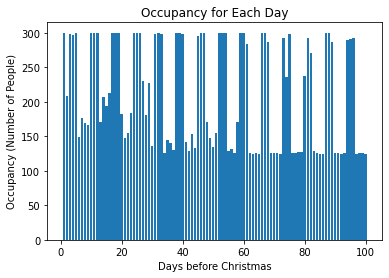

In [13]:
# Total costs (preference cost + accounting penalty) under this solution

# Occupancy per assigned day
OccupancyperDay = []
for d in range(n_assignedday): # for each assigned day  
    n_occupancy = sum(model.x[f,d]()*n_people[f] for f in range(n_family))
    OccupancyperDay.append(n_occupancy)
    
# Accounting penalty
AccPenalty = []
for d in range(n_assignedday-1): # for each assigned day1 - day99  (index 0-98)    
    n_d = OccupancyperDay[d]
    n_d1 = OccupancyperDay[d+1]
    accounting_penalty = (n_d-125)/400 * (n_d**(0.5+(abs(n_d-n_d1)/50)))  # accounting penalty equation 
    AccPenalty.append(accounting_penalty)

# for the initial condition of d=100, n101=n100 (index 99)
n_d = OccupancyperDay[n_assignedday-1]
n_d1 = n_d 
accounting_penalty = (n_d-125)/400 * (n_d**(0.5+(abs(n_d-n_d1)/50)))  # accounting penalty equation 
AccPenalty.append(accounting_penalty)   

# Total accounting penalty
totAccPenalty = sum(AccPenalty[d] for d in range(n_assignedday))

#------------------------------

# Plot occupancy for each day

assigneddayList = list(range(1, n_assignedday+1))
plt.bar(assigneddayList, OccupancyperDay)
plt.title("Occupancy for Each Day")
plt.ylabel("Occupancy (Number of People)") 
plt.xlabel("Days before Christmas") 
plt.show()

In [14]:
# Total Cost Summary

# Total preference cost 
print("Total preference cost:", model.Objective()) # 48918.0

# Total accounting penalty
print("Total accounting penalty:", totAccPenalty)  # 10677776967.094584

# Total costs (preference cost + accounting penalty)
print("Total costs (preference cost + accounting penalty):", model.Objective()+totAccPenalty) # 10677825885.094584

Total preference cost: 48918.0
Total accounting penalty: 10677776967.094584
Total costs (preference cost + accounting penalty): 10677825885.094584


## Part D. Model 2 - Consider the Accounting Penalty Equation to create additional constraint and DVs to minimize "Preference Cost" and "Partial Accounting Penalty" 

To try to minimize Accounting Penalty, let's consider minimizing "total |Nd-Nd+1| over the 100 assigned days" (sum of |current day occupancy - previous day occupancy|) first.

In [15]:
# declare a concrete model
model = ConcreteModel()

# declare the decision variables: 

# Whether family assigned to that day?
model.x = Var(range(n_family), range(n_assignedday), domain = Binary) # (n_family * n_assignedday)

# positive and negative part of (Nd-Nd+1) -> to minimize sum of |current day occupancy - previous day occupancy|
model.y = Var(range(2), range(n_assignedday), domain = NonNegativeIntegers)   # 2 (pos and neg part) * n_assignedday

# f refers to the family_id
# d refers to the assigned day
# c refers to the choice

# specify the objective: Minimize Preference Cost and "Partial" Accounting Penalty

# Preference cost
totPrefCost = sum(model.x[f,d]*prefCost_matrix[f][d] for f in range(n_family) for d in range(n_assignedday)) 

# "Partial" Accounting Penalty: sum of absolute occupancy difference = sum of all pos and neg parts
partAccPenalty = sum(model.y[i,d] for i in range(2) for d in range(n_assignedday))  
 
model.Objective = Objective(expr = totPrefCost + partAccPenalty, sense= minimize) 

#-------------------------

# Constraint: Every family must be scheduled for one and only one assigned day
model.OneAssignedDay =  ConstraintList() 
for f in range(n_family): # for each family
    model.OneAssignedDay.add(expr = sum(model.x[f,d] for d in range(n_assignedday)) == 1)

# Constraint: The total number of people attending the workshop each day must be between 125 - 300

# lower bound occupancy constraint
model.OccupancyMin =  ConstraintList() 
for d in range(n_assignedday): # for each assigned day
    model.OccupancyMin.add(expr = sum(model.x[f,d]*n_people[f] for f in range(n_family)) >= min_occupancy)

# upper bound occupancy constraint
model.OccupancyMax =  ConstraintList() 
for d in range(n_assignedday): # for each assigned day
    model.OccupancyMax.add(expr = sum(model.x[f,d]*n_people[f] for f in range(n_family)) <= max_occupancy)

#-------------------------    

# Occupancy per assigned day
OccupancyperDay = []
for d in range(n_assignedday): # for each assigned day  
    OccupancyperDay.append(sum(model.x[f,d]*n_people[f] for f in range(n_family)))

# (Nd-Nd+1): current day occupancy - previous day occupancy
OccupancyDiffperday = []
for d in range(n_assignedday-1): # for each assigned day1 - day99  (index 0-98)  
    diff = OccupancyperDay[d]-OccupancyperDay[d+1]
    OccupancyDiffperday.append(diff)
# for the initial condition of d=100, n101=n100 (index 99)
OccupancyDiffperday.append(OccupancyperDay[n_assignedday-1]-OccupancyperDay[n_assignedday-1])    
        
# Add new constraint: Positive - negative part of (Nd-Nd+1) = current day occupancy - previous day occupancy
model.OccupancyDiff =  ConstraintList() 
for d in range(n_assignedday): # for each assigned day
    model.OccupancyDiff.add(expr = (model.y[0,d]-model.y[1,d]) == OccupancyDiffperday[d])    # pos-neg
    

# specify the solver and solve
opt = SolverFactory('glpk')
opt.options["tmlim"] = 10000
results = opt.solve(model, tee = True)    

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --tmlim 10000 --write C:\Users\User\AppData\Local\Temp\tmpiupfsjz1.glpk.raw
 --wglp C:\Users\User\AppData\Local\Temp\tmp1z857sx1.glpk.glp --cpxlp C:\Users\User\AppData\Local\Temp\tmpj_hy9pt2.pyomo.lp
Reading problem data from 'C:\Users\User\AppData\Local\Temp\tmpj_hy9pt2.pyomo.lp'...
C:\Users\User\AppData\Local\Temp\tmpj_hy9pt2.pyomo.lp:3501714: warning: lower bound of variable 'x1' redefined
C:\Users\User\AppData\Local\Temp\tmpj_hy9pt2.pyomo.lp:3501714: warning: upper bound of variable 'x1' redefined
5301 rows, 500201 columns, 2490201 non-zeros
500200 integer variables, 500000 of which are binary
4001714 lines were read
Writing problem data to 'C:\Users\User\AppData\Local\Temp\tmp1z857sx1.glpk.glp'...
3496308 lines were written
GLPK Integer Optimizer, v4.65
5301 rows, 500201 columns, 2490201 non-zeros
500200 integer variables, 500000 of which are binary
Preprocessing...
5300 rows, 500200 columns, 2490200 no

Time used: 61.1 secs.  Memory used: 512.0 Mb.
+ 46129: mip =     not found yet >=   4.806900000e+04        (21; 0)
+ 46144: mip =     not found yet >=   4.806900000e+04        (23; 0)
+ 46159: mip =     not found yet >=   4.806900000e+04        (25; 0)
+ 46177: mip =     not found yet >=   4.806900000e+04        (27; 0)
+ 46180: mip =     not found yet >=   4.806900000e+04        (29; 0)
+ 46189: mip =     not found yet >=   4.806900000e+04        (31; 0)
+ 46199: mip =     not found yet >=   4.806900000e+04        (33; 0)
+ 46202: mip =     not found yet >=   4.806900000e+04        (35; 0)
+ 46214: mip =     not found yet >=   4.806900000e+04        (37; 0)
Time used: 124.0 secs.  Memory used: 512.0 Mb.
+ 46223: mip =     not found yet >=   4.806900000e+04        (39; 0)
+ 46229: mip =     not found yet >=   4.806900000e+04        (41; 0)
+ 46231: mip =     not found yet >=   4.806900000e+04        (43; 0)
+ 46233: mip =     not found yet >=   4.806900000e+04        (45; 0)
+ 46236: m

+ 47052: mip =     not found yet >=   4.806900000e+04        (241; 0)
+ 47054: mip =     not found yet >=   4.806900000e+04        (243; 0)
+ 47056: mip =     not found yet >=   4.806900000e+04        (245; 0)
+ 47061: mip =     not found yet >=   4.806900000e+04        (247; 0)
Time used: 804.8 secs.  Memory used: 512.7 Mb.
+ 47065: mip =     not found yet >=   4.806900000e+04        (249; 0)
+ 47079: mip =     not found yet >=   4.806900000e+04        (251; 0)
+ 47094: mip =     not found yet >=   4.806900000e+04        (253; 0)
+ 47107: mip =     not found yet >=   4.806900000e+04        (255; 0)
+ 47114: mip =     not found yet >=   4.806900000e+04        (257; 0)
+ 47118: mip =     not found yet >=   4.806900000e+04        (259; 0)
+ 47145: mip =     not found yet >=   4.806900000e+04        (261; 0)
+ 47161: mip =     not found yet >=   4.806900000e+04        (263; 0)
+ 47164: mip =     not found yet >=   4.806900000e+04        (265; 0)
+ 47166: mip =     not found yet >=   4.806

+ 48695: mip =     not found yet >=   4.806900000e+04        (499; 0)
+ 48750: mip =     not found yet >=   4.806900000e+04        (502; 0)
+ 48755: mip =     not found yet >=   4.806900000e+04        (505; 0)
+ 48758: mip =     not found yet >=   4.806900000e+04        (508; 0)
+ 48761: mip =     not found yet >=   4.806900000e+04        (511; 0)
Time used: 1477.0 secs.  Memory used: 513.3 Mb.
+ 48786: mip =     not found yet >=   4.806900000e+04        (513; 0)
+ 48820: mip =     not found yet >=   4.806900000e+04        (516; 0)
+ 48847: mip =     not found yet >=   4.806900000e+04        (518; 0)
+ 48892: mip =     not found yet >=   4.806900000e+04        (521; 0)
+ 48961: mip =     not found yet >=   4.806900000e+04        (523; 0)
+ 48988: mip =     not found yet >=   4.806900000e+04        (526; 0)
+ 49002: mip =     not found yet >=   4.806900000e+04        (529; 0)
+ 49016: mip =     not found yet >=   4.806900000e+04        (532; 0)
+ 49042: mip =     not found yet >=   4.80

+ 51644: mip =     not found yet >=   4.806900000e+04        (847; 0)
+ 51652: mip =     not found yet >=   4.806900000e+04        (851; 0)
+ 51716: mip =     not found yet >=   4.806900000e+04        (854; 0)
+ 51783: mip =     not found yet >=   4.806900000e+04        (858; 0)
+ 51808: mip =     not found yet >=   4.806900000e+04        (861; 0)
+ 51842: mip =     not found yet >=   4.806900000e+04        (865; 0)
+ 51854: mip =     not found yet >=   4.806900000e+04        (868; 0)
+ 51881: mip =     not found yet >=   4.806900000e+04        (872; 0)
Time used: 2147.8 secs.  Memory used: 514.3 Mb.
+ 51914: mip =     not found yet >=   4.806900000e+04        (875; 0)
+ 51991: mip =     not found yet >=   4.806900000e+04        (878; 0)
+ 52035: mip =     not found yet >=   4.806900000e+04        (882; 0)
+ 52091: mip =     not found yet >=   4.806900000e+04        (886; 0)
+ 52141: mip =     not found yet >=   4.806900000e+04        (889; 0)
+ 52152: mip =     not found yet >=   4.80

+ 55417: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1253; 1)
Time used: 2761.5 secs.  Memory used: 519.1 Mb.
+ 55434: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1255; 1)
+ 55448: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1257; 1)
+ 55453: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1259; 1)
+ 55456: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1261; 1)
+ 55458: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1263; 1)
+ 55472: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1265; 1)
+ 55478: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1267; 1)
Time used: 2822.0 secs.  Memory used: 519.1 Mb.
+ 55480: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1269; 1)
+ 55483: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1271; 1)
+ 55502: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1273; 1)
+ 55505: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1275; 1)
+ 55511: mip =   5.481900000e+04 >=   4.807100000e+0

+ 56419: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1466; 1)
+ 56425: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1468; 1)
+ 56429: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1470; 1)
+ 56432: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1472; 1)
+ 56440: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1474; 1)
+ 56448: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1476; 1)
+ 56452: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1478; 1)
Time used: 3565.4 secs.  Memory used: 520.4 Mb.
+ 56457: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1480; 1)
+ 56459: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1482; 1)
+ 56464: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1484; 1)
+ 56483: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1486; 1)
+ 56488: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1488; 1)
+ 56501: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1490; 1)
+ 56507: mip =   5.481900000e

+ 58302: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1713; 1)
+ 58360: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1716; 1)
+ 58363: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1719; 1)
+ 58368: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1722; 1)
+ 58396: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1725; 1)
+ 58445: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1728; 1)
+ 58482: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1731; 1)
+ 58500: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1734; 1)
+ 58535: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1737; 1)
Time used: 4240.1 secs.  Memory used: 521.8 Mb.
+ 58544: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1741; 1)
+ 58549: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1744; 1)
+ 58574: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1748; 1)
+ 58596: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (1751; 1)
+ 58652: mip =   5.481900000e

+ 61212: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2045; 1)
+ 61296: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2048; 1)
+ 61318: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2052; 1)
Time used: 4850.3 secs.  Memory used: 530.1 Mb.
+ 61395: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2055; 1)
+ 61399: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2059; 1)
+ 61412: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2063; 1)
+ 61423: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2066; 1)
+ 61432: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2070; 1)
+ 61455: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2073; 1)
+ 61465: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2076; 1)
+ 61505: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2080; 1)
+ 61512: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2084; 1)
+ 61516: mip =   5.481900000e+04 >=   4.807100000e+04  12.3% (2087; 1)
+ 61547: mip =   5.481900000e

+ 65296: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2432; 2)
+ 65302: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2434; 2)
+ 65304: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2436; 2)
+ 65306: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2438; 2)
+ 65309: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2440; 2)
+ 65319: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2442; 2)
Time used: 5518.7 secs.  Memory used: 545.5 Mb.
+ 65323: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2444; 2)
+ 65328: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2446; 2)
+ 65330: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2448; 2)
+ 65334: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2450; 2)
+ 65337: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2452; 2)
+ 65347: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2454; 2)
+ 65349: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2456; 2)
+ 65352: mip =   5.481900000e

+ 66078: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2648; 2)
+ 66081: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2650; 2)
+ 66090: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2652; 2)
+ 66101: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2654; 2)
+ 66118: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2656; 2)
+ 66129: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2658; 2)
+ 66135: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2660; 2)
+ 66158: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2662; 2)
+ 66165: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2664; 2)
Time used: 6260.4 secs.  Memory used: 546.9 Mb.
+ 66175: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2666; 2)
+ 66189: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2668; 2)
+ 66220: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2670; 2)
+ 66237: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2672; 2)
+ 66265: mip =   5.481900000e

+ 67835: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2879; 2)
+ 67881: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2881; 2)
Time used: 6876.4 secs.  Memory used: 548.1 Mb.
+ 67888: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2884; 2)
+ 67893: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2886; 2)
+ 67899: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2888; 2)
+ 67929: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2890; 2)
+ 67940: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2892; 2)
+ 67945: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2895; 2)
+ 67955: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2897; 2)
+ 67960: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2899; 2)
+ 67964: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2902; 2)
+ 67980: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (2904; 2)
Time used: 6937.5 secs.  Memory used: 548.1 Mb.
+ 67985: mip =   5.481900000e+04 >=   4.807400000e+0

+ 69948: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3173; 2)
+ 69971: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3176; 2)
+ 70040: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3180; 2)
+ 70062: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3183; 2)
Time used: 7548.9 secs.  Memory used: 551.0 Mb.
+ 70092: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3187; 2)
+ 70096: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3191; 2)
+ 70102: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3194; 2)
+ 70142: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3197; 2)
+ 70158: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3200; 2)
+ 70174: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3204; 2)
+ 70231: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3207; 2)
+ 70262: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3210; 2)
+ 70266: mip =   5.481900000e+04 >=   4.807400000e+04  12.3% (3214; 2)
+ 70271: mip =   5.481900000e

+ 72598: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3008; 1064)
+ 72600: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3010; 1064)
+ 72610: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3012; 1064)
+ 72617: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3014; 1064)
+ 72622: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3016; 1064)
+ 72629: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3018; 1064)
Time used: 8221.2 secs.  Memory used: 566.0 Mb.
+ 72640: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3020; 1064)
+ 72642: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3022; 1064)
+ 72654: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3024; 1064)
+ 72658: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3026; 1064)
+ 72661: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3028; 1064)
+ 72667: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3030; 1064)
+ 72685: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (30

+ 73785: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3220; 1064)
Time used: 8897.7 secs.  Memory used: 566.0 Mb.
+ 73797: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3223; 1064)
+ 73812: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3225; 1064)
+ 73819: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3227; 1064)
+ 73824: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3229; 1064)
+ 73848: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3231; 1064)
+ 73874: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3233; 1064)
+ 73891: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3235; 1064)
+ 73913: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3238; 1064)
+ 73929: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3241; 1064)
+ 73937: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3244; 1064)
Time used: 8957.7 secs.  Memory used: 566.0 Mb.
+ 73940: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3247; 1064)
+ 73991: mip =  

+ 75792: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3515; 1064)
+ 75821: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3518; 1064)
+ 75854: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3521; 1064)
+ 75887: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3524; 1064)
+ 75901: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3526; 1064)
Time used: 9569.9 secs.  Memory used: 568.8 Mb.
+ 75911: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3529; 1064)
+ 75915: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3532; 1064)
+ 75937: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3535; 1064)
+ 75961: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3537; 1064)
+ 75998: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3540; 1064)
+ 76024: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3543; 1064)
+ 76038: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (3546; 1064)
+ 76050: mip =   5.318800000e+04 >=   4.807400000e+04   9.6% (35

In [16]:
# print the solution

totPrefCost = sum(model.x[f,d]()*prefCost_matrix[f][d] for f in range(n_family) for d in range(n_assignedday)) 

# Total preference cost 
print("Total preference cost:", totPrefCost) 

# save the solution to a dataframe
sol_prefPartacc = []
for f in range(n_family): # for each family
    familyassigned = []
    familyassigned.append(f)
    for d in range(n_assignedday): # for each assigned day
        if model.x[f,d]() == 1:
            familyassigned.append(d+1)
    sol_prefPartacc.append(familyassigned)
        
df_sol_prefPartacc = pd.DataFrame(sol_prefPartacc, columns = ["family_id","assigned_day"])
df_sol_prefPartacc

Total preference cost: 48517.0


family_id  assigned_day
0             0            52
1             1            26
2             2           100
3             3             2
4             4            53
...         ...           ...
4995       4995            16
4996       4996            88
4997       4997            32
4998       4998            92
4999       4999            13

[5000 rows x 2 columns]

In [29]:
# Export df to csv
df_sol_prefPartacc.to_csv("solution_M2_prefPartacc.csv", index=False)

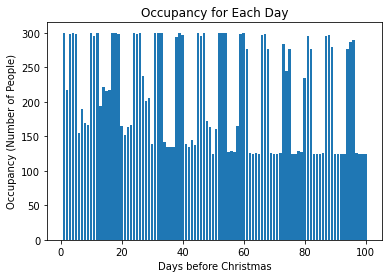

In [17]:
# Total costs (preference cost + accounting penalty) under this solution

# Occupancy per assigned day
OccupancyperDay = []
for d in range(n_assignedday): # for each assigned day  
    n_occupancy = sum(model.x[f,d]()*n_people[f] for f in range(n_family))
    OccupancyperDay.append(n_occupancy)
    
# Accounting penalty
AccPenalty = []
for d in range(n_assignedday-1): # for each assigned day1 - day99  (index 0-98)    
    n_d = OccupancyperDay[d]
    n_d1 = OccupancyperDay[d+1]
    accounting_penalty = (n_d-125)/400 * (n_d**(0.5+(abs(n_d-n_d1)/50)))  # accounting penalty equation 
    AccPenalty.append(accounting_penalty)

# for the initial condition of d=100, n101=n100 (index 99)
n_d = OccupancyperDay[n_assignedday-1]
n_d1 = n_d 
accounting_penalty = (n_d-125)/400 * (n_d**(0.5+(abs(n_d-n_d1)/50)))  # accounting penalty equation 
AccPenalty.append(accounting_penalty)   

# Total accounting penalty
totAccPenalty = sum(AccPenalty[d] for d in range(n_assignedday))

#------------------------------

# Plot occupancy for each day

assigneddayList = list(range(1, n_assignedday+1))
plt.bar(assigneddayList, OccupancyperDay)
plt.title("Occupancy for Each Day")
plt.ylabel("Occupancy (Number of People)") 
plt.xlabel("Days before Christmas") 
plt.show()

In [18]:
# Total Cost Summary

# Total preference cost 
print("Total preference cost:", totPrefCost) # 48517.0

# Total accounting penalty
print("Total accounting penalty:", totAccPenalty)  # 5718658621.934224

# Total costs (preference cost + accounting penalty)
print("Total costs (preference cost + accounting penalty):", totPrefCost+totAccPenalty) # 5718707138.934224

Total preference cost: 48517.0
Total accounting penalty: 5718658621.934224
Total costs (preference cost + accounting penalty): 5718707138.934224


## Part E. Model 3 -  Create additional constraints and DVs to minimize "Preference Cost" by limiting Accounting Penalty

To try to minimize Accounting Penalty, this time consider limiting "|Nd-Nd+1|" for each assigned day (|current day occupancy - previous day occupancy| <= Occupancy Difference Max 25).

In [32]:
# declare a concrete model
model = ConcreteModel()

# declare the decision variables: 

# Whether family assigned to that day?
model.x = Var(range(n_family), range(n_assignedday), domain = Binary) # (n_family * n_assignedday)

# positive and negative part of (Nd-Nd+1) -> to limit |current day occupancy - previous day occupancy| <= Occupancy Difference Max
model.y = Var(range(2), range(n_assignedday), domain = NonNegativeIntegers)   # 2 (pos and neg part) * n_assignedday

# f refers to the family_id
# d refers to the assigned day
# c refers to the choice

# specify the objective: Minimize Preference Cost
model.Objective = Objective(expr = sum(model.x[f,d]*prefCost_matrix[f][d] for f in range(n_family) for d in range(n_assignedday)), sense= minimize) 

#-------------------------

# Constraint: Every family must be scheduled for one and only one assigned day
model.OneAssignedDay =  ConstraintList() 
for f in range(n_family): # for each family
    model.OneAssignedDay.add(expr = sum(model.x[f,d] for d in range(n_assignedday)) == 1)

# Constraint: The total number of people attending the workshop each day must be between 125 - 300

# lower bound occupancy constraint
model.OccupancyMin =  ConstraintList() 
for d in range(n_assignedday): # for each assigned day
    model.OccupancyMin.add(expr = sum(model.x[f,d]*n_people[f] for f in range(n_family)) >= min_occupancy)

# upper bound occupancy constraint
model.OccupancyMax =  ConstraintList() 
for d in range(n_assignedday): # for each assigned day
    model.OccupancyMax.add(expr = sum(model.x[f,d]*n_people[f] for f in range(n_family)) <= max_occupancy)

#-------------------------    

# Occupancy per assigned day
OccupancyperDay = []
for d in range(n_assignedday): # for each assigned day  
    OccupancyperDay.append(sum(model.x[f,d]*n_people[f] for f in range(n_family)))

# (Nd-Nd+1): current day occupancy - previous day occupancy
OccupancyDiffperday = []
for d in range(n_assignedday-1): # for each assigned day1 - day99  (index 0-98)  
    diff = OccupancyperDay[d]-OccupancyperDay[d+1]
    OccupancyDiffperday.append(diff)
# for the initial condition of d=100, n101=n100 (index 99)
OccupancyDiffperday.append(OccupancyperDay[n_assignedday-1]-OccupancyperDay[n_assignedday-1])    
        
# Add new constraint: Positive - negative part of (Nd-Nd+1) = current day occupancy - previous day occupancy
model.OccupancyDiff =  ConstraintList() 
for d in range(n_assignedday): # for each assigned day
    model.OccupancyDiff.add(expr = (model.y[0,d]-model.y[1,d]) == OccupancyDiffperday[d])    # pos-neg
    
# Add new constraint: Pos part of (Nd-Nd+1) <= Occupancy Difference Max, neg part of (Nd-Nd+1) <= Occupancy Difference Max
OccuDiffMax = 25

model.OccupancyPosDiffMax =  ConstraintList() 
for d in range(n_assignedday): # for each assigned day
    model.OccupancyPosDiffMax.add(expr = (model.y[0,d]) <= OccuDiffMax)    # Pos part of (Nd-Nd+1)

model.OccupancyNegDiffMax =  ConstraintList() 
for d in range(n_assignedday): # for each assigned day
    model.OccupancyNegDiffMax.add(expr = (model.y[1,d]) <= OccuDiffMax)    # Neg part of (Nd-Nd+1)    
    
#-------------------------   

# specify the solver and solve
opt = SolverFactory('glpk')
opt.options["tmlim"] = 22000
results = opt.solve(model, tee = True)    

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --tmlim 22000 --write C:\Users\User\AppData\Local\Temp\tmpj_1jr0kw.glpk.raw
 --wglp C:\Users\User\AppData\Local\Temp\tmpuvr5jme_.glpk.glp --cpxlp C:\Users\User\AppData\Local\Temp\tmp5hbav8u2.pyomo.lp
Reading problem data from 'C:\Users\User\AppData\Local\Temp\tmp5hbav8u2.pyomo.lp'...
C:\Users\User\AppData\Local\Temp\tmp5hbav8u2.pyomo.lp:3502314: warning: lower bound of variable 'x1' redefined
C:\Users\User\AppData\Local\Temp\tmp5hbav8u2.pyomo.lp:3502314: warning: upper bound of variable 'x1' redefined
5501 rows, 500201 columns, 2490401 non-zeros
500200 integer variables, 500000 of which are binary
4002314 lines were read
Writing problem data to 'C:\Users\User\AppData\Local\Temp\tmpuvr5jme_.glpk.glp'...
3496708 lines were written
GLPK Integer Optimizer, v4.65
5501 rows, 500201 columns, 2490401 non-zeros
500200 integer variables, 500000 of which are binary
Preprocessing...
5300 rows, 500200 columns, 2490200 no

+ 44367: mip =     not found yet >=   7.370600000e+04        (18; 0)
+ 44376: mip =     not found yet >=   7.370600000e+04        (19; 0)
+ 44385: mip =     not found yet >=   7.370600000e+04        (20; 0)
Time used: 129.3 secs.  Memory used: 510.8 Mb.
+ 44393: mip =     not found yet >=   7.370600000e+04        (21; 0)
+ 44407: mip =     not found yet >=   7.370600000e+04        (22; 0)
+ 44444: mip =     not found yet >=   7.370600000e+04        (23; 0)
+ 44449: mip =     not found yet >=   7.370600000e+04        (24; 0)
+ 44461: mip =     not found yet >=   7.370600000e+04        (25; 0)
+ 44462: mip =     not found yet >=   7.370600000e+04        (26; 0)
+ 44526: mip =     not found yet >=   7.370600000e+04        (27; 0)
+ 44542: mip =     not found yet >=   7.370600000e+04        (28; 0)
+ 44546: mip =     not found yet >=   7.370600000e+04        (29; 0)
Time used: 194.1 secs.  Memory used: 510.8 Mb.
+ 44548: mip =     not found yet >=   7.370600000e+04        (30; 0)
+ 44552: 

+ 46273: mip =     not found yet >=   7.370600000e+04        (153; 0)
+ 46282: mip =     not found yet >=   7.370600000e+04        (154; 0)
Time used: 887.2 secs.  Memory used: 511.2 Mb.
+ 46303: mip =     not found yet >=   7.370600000e+04        (155; 0)
+ 46314: mip =     not found yet >=   7.370600000e+04        (157; 0)
+ 46352: mip =     not found yet >=   7.370600000e+04        (158; 0)
+ 46361: mip =     not found yet >=   7.370600000e+04        (159; 0)
+ 46365: mip =     not found yet >=   7.370600000e+04        (160; 0)
+ 46371: mip =     not found yet >=   7.370600000e+04        (161; 0)
+ 46386: mip =     not found yet >=   7.370600000e+04        (162; 0)
+ 46392: mip =     not found yet >=   7.370600000e+04        (163; 0)
+ 46406: mip =     not found yet >=   7.370600000e+04        (165; 0)
+ 46423: mip =     not found yet >=   7.370600000e+04        (166; 0)
Time used: 950.1 secs.  Memory used: 511.3 Mb.
+ 46427: mip =     not found yet >=   7.370600000e+04        (167;

+ 48102: mip =     not found yet >=   7.370600000e+04        (311; 0)
+ 48112: mip =     not found yet >=   7.370600000e+04        (312; 0)
+ 48126: mip =     not found yet >=   7.370600000e+04        (313; 0)
+ 48182: mip =     not found yet >=   7.370600000e+04        (314; 0)
+ 48209: mip =     not found yet >=   7.370600000e+04        (315; 0)
+ 48297: mip =     not found yet >=   7.370600000e+04        (316; 0)
Time used: 1709.5 secs.  Memory used: 511.7 Mb.
+ 48315: mip =     not found yet >=   7.370600000e+04        (317; 0)
+ 48324: mip =     not found yet >=   7.370600000e+04        (318; 0)
+ 48333: mip =     not found yet >=   7.370600000e+04        (319; 0)
+ 48334: mip =     not found yet >=   7.370600000e+04        (320; 0)
+ 48369: mip =     not found yet >=   7.370600000e+04        (321; 0)
+ 48386: mip =     not found yet >=   7.370600000e+04        (323; 0)
+ 48422: mip =     not found yet >=   7.370600000e+04        (325; 0)
+ 48423: mip =     not found yet >=   7.37

+ 50543: mip =     not found yet >=   7.370600000e+04        (474; 0)
+ 50568: mip =     not found yet >=   7.370600000e+04        (476; 0)
+ 50582: mip =     not found yet >=   7.370600000e+04        (478; 0)
+ 50595: mip =     not found yet >=   7.370600000e+04        (480; 0)
+ 50597: mip =     not found yet >=   7.370600000e+04        (482; 0)
+ 50604: mip =     not found yet >=   7.370600000e+04        (484; 0)
Time used: 2526.0 secs.  Memory used: 512.3 Mb.
+ 50623: mip =     not found yet >=   7.370600000e+04        (486; 0)
+ 50643: mip =     not found yet >=   7.370600000e+04        (488; 0)
+ 50645: mip =     not found yet >=   7.370600000e+04        (490; 0)
+ 50655: mip =     not found yet >=   7.370600000e+04        (492; 0)
+ 50678: mip =     not found yet >=   7.370600000e+04        (494; 0)
+ 50694: mip =     not found yet >=   7.370600000e+04        (496; 0)
+ 50703: mip =     not found yet >=   7.370600000e+04        (498; 0)
Time used: 2588.0 secs.  Memory used: 512.

+ 53184: mip =     not found yet >=   7.370600000e+04        (628; 0)
+ 53215: mip =     not found yet >=   7.370600000e+04        (630; 0)
+ 53218: mip =     not found yet >=   7.370600000e+04        (632; 0)
Time used: 3276.5 secs.  Memory used: 512.7 Mb.
+ 53244: mip =     not found yet >=   7.370600000e+04        (633; 0)
+ 53274: mip =     not found yet >=   7.370600000e+04        (635; 0)
+ 53275: mip =     not found yet >=   7.370600000e+04        (636; 0)
+ 53303: mip =     not found yet >=   7.370600000e+04        (637; 0)
+ 53319: mip =     not found yet >=   7.370600000e+04        (638; 0)
+ 53341: mip =     not found yet >=   7.370600000e+04        (639; 0)
+ 53365: mip =     not found yet >=   7.370600000e+04        (641; 0)
+ 53433: mip =     not found yet >=   7.370600000e+04        (643; 0)
+ 53453: mip =     not found yet >=   7.370600000e+04        (644; 0)
Time used: 3338.3 secs.  Memory used: 512.8 Mb.
+ 53478: mip =     not found yet >=   7.370600000e+04        (64

+ 56282: mip =     not found yet >=   7.370600000e+04        (782; 0)
Time used: 4020.6 secs.  Memory used: 513.1 Mb.
+ 56318: mip =     not found yet >=   7.370600000e+04        (784; 0)
+ 56349: mip =     not found yet >=   7.370600000e+04        (786; 0)
+ 56403: mip =     not found yet >=   7.370600000e+04        (788; 0)
+ 56477: mip =     not found yet >=   7.370600000e+04        (790; 0)
+ 56501: mip =     not found yet >=   7.370600000e+04        (792; 0)
+ 56516: mip =     not found yet >=   7.370600000e+04        (794; 0)
+ 56538: mip =     not found yet >=   7.370600000e+04        (796; 0)
+ 56585: mip =     not found yet >=   7.370600000e+04        (797; 0)
Time used: 4080.8 secs.  Memory used: 513.1 Mb.
+ 56609: mip =     not found yet >=   7.370600000e+04        (798; 0)
+ 56620: mip =     not found yet >=   7.370600000e+04        (800; 0)
+ 56702: mip =     not found yet >=   7.370600000e+04        (802; 0)
+ 56720: mip =     not found yet >=   7.370600000e+04        (80

+ 60957: mip =     not found yet >=   7.370600000e+04        (985; 0)
+ 60979: mip =     not found yet >=   7.370600000e+04        (987; 0)
+ 61036: mip =     not found yet >=   7.370600000e+04        (989; 0)
+ 61052: mip =     not found yet >=   7.370600000e+04        (991; 0)
+ 61145: mip =     not found yet >=   7.370600000e+04        (993; 0)
Time used: 4884.6 secs.  Memory used: 513.7 Mb.
+ 61153: mip =     not found yet >=   7.370600000e+04        (995; 0)
+ 61163: mip =     not found yet >=   7.370600000e+04        (997; 0)
+ 61224: mip =     not found yet >=   7.370600000e+04        (999; 0)
+ 61327: mip =     not found yet >=   7.370600000e+04        (1001; 0)
+ 61370: mip =     not found yet >=   7.370600000e+04        (1003; 0)
+ 61465: mip =     not found yet >=   7.370600000e+04        (1005; 0)
+ 61553: mip =     not found yet >=   7.370600000e+04        (1007; 0)
Time used: 4946.2 secs.  Memory used: 513.8 Mb.
+ 61575: mip =     not found yet >=   7.370600000e+04       

+ 65512: mip =     not found yet >=   7.370600000e+04        (1198; 0)
+ 65652: mip =     not found yet >=   7.370600000e+04        (1199; 0)
+ 65698: mip =     not found yet >=   7.370600000e+04        (1201; 0)
+ 65713: mip =     not found yet >=   7.370600000e+04        (1203; 0)
+ 65721: mip =     not found yet >=   7.370600000e+04        (1205; 0)
+ 65741: mip =     not found yet >=   7.370600000e+04        (1207; 0)
+ 65770: mip =     not found yet >=   7.370600000e+04        (1208; 0)
+ 65772: mip =     not found yet >=   7.370600000e+04        (1210; 0)
+ 65824: mip =     not found yet >=   7.370600000e+04        (1211; 0)
Time used: 5690.0 secs.  Memory used: 514.3 Mb.
+ 65920: mip =     not found yet >=   7.370600000e+04        (1213; 0)
+ 65952: mip =     not found yet >=   7.370600000e+04        (1215; 0)
+ 66082: mip =     not found yet >=   7.370600000e+04        (1216; 0)
+ 66169: mip =     not found yet >=   7.370600000e+04        (1218; 0)
+ 66174: mip =     not found 

+ 71324: mip =     not found yet >=   7.370600000e+04        (1400; 0)
+ 71345: mip =     not found yet >=   7.370600000e+04        (1402; 0)
+ 71347: mip =     not found yet >=   7.370600000e+04        (1404; 0)
+ 71377: mip =     not found yet >=   7.370600000e+04        (1405; 0)
+ 71435: mip =     not found yet >=   7.370600000e+04        (1407; 0)
+ 71497: mip =     not found yet >=   7.370600000e+04        (1409; 0)
Time used: 6445.2 secs.  Memory used: 515.0 Mb.
+ 71507: mip =     not found yet >=   7.370600000e+04        (1411; 0)
+ 71631: mip =     not found yet >=   7.370600000e+04        (1413; 0)
+ 71800: mip =     not found yet >=   7.370600000e+04        (1415; 0)
+ 71852: mip =     not found yet >=   7.370600000e+04        (1417; 0)
+ 71937: mip =     not found yet >=   7.370600000e+04        (1419; 0)
+ 72002: mip =     not found yet >=   7.370600000e+04        (1421; 0)
+ 72065: mip =     not found yet >=   7.370600000e+04        (1423; 0)
+ 72106: mip =     not found 

+ 76370: mip =     not found yet >=   7.370600000e+04        (1607; 0)
+ 76444: mip =     not found yet >=   7.370600000e+04        (1609; 0)
+ 76499: mip =     not found yet >=   7.370600000e+04        (1611; 0)
+ 76538: mip =     not found yet >=   7.370600000e+04        (1613; 0)
+ 76569: mip =     not found yet >=   7.370600000e+04        (1615; 0)
+ 76598: mip =     not found yet >=   7.370600000e+04        (1617; 0)
Time used: 7248.0 secs.  Memory used: 516.7 Mb.
+ 76631: mip =     not found yet >=   7.370600000e+04        (1619; 0)
+ 76709: mip =     not found yet >=   7.370600000e+04        (1621; 0)
+ 76791: mip =     not found yet >=   7.370600000e+04        (1622; 0)
+ 76841: mip =     not found yet >=   7.370600000e+04        (1624; 0)
+ 76856: mip =     not found yet >=   7.370600000e+04        (1626; 0)
+ 76982: mip =     not found yet >=   7.370600000e+04        (1628; 0)
+ 77036: mip =     not found yet >=   7.370600000e+04        (1630; 0)
+ 77118: mip =     not found 

+ 81331: mip =     not found yet >=   7.370600000e+04        (1827; 0)
+ 81356: mip =     not found yet >=   7.370600000e+04        (1829; 0)
+ 81527: mip =     not found yet >=   7.370600000e+04        (1831; 0)
+ 81600: mip =     not found yet >=   7.370600000e+04        (1833; 0)
+ 81682: mip =     not found yet >=   7.370600000e+04        (1835; 0)
+ 81737: mip =     not found yet >=   7.370600000e+04        (1837; 0)
+ 81818: mip =     not found yet >=   7.370600000e+04        (1839; 0)
Time used: 7990.2 secs.  Memory used: 517.2 Mb.
+ 81851: mip =     not found yet >=   7.370600000e+04        (1841; 0)
+ 81969: mip =     not found yet >=   7.370600000e+04        (1843; 0)
+ 82004: mip =     not found yet >=   7.370600000e+04        (1846; 0)
+ 82055: mip =     not found yet >=   7.370600000e+04        (1849; 0)
+ 82088: mip =     not found yet >=   7.370600000e+04        (1852; 0)
+ 82112: mip =     not found yet >=   7.370600000e+04        (1855; 0)
+ 82140: mip =     not found 

+ 88038: mip =     not found yet >=   7.370600000e+04        (2086; 0)
+ 88138: mip =     not found yet >=   7.370600000e+04        (2088; 0)
+ 88182: mip =     not found yet >=   7.370600000e+04        (2090; 0)
+ 88228: mip =     not found yet >=   7.370600000e+04        (2092; 0)
Time used: 8670.0 secs.  Memory used: 517.9 Mb.
+ 88319: mip =     not found yet >=   7.370600000e+04        (2094; 0)
+ 88335: mip =     not found yet >=   7.370600000e+04        (2096; 0)
+ 88464: mip =     not found yet >=   7.370600000e+04        (2098; 0)
+ 88665: mip =     not found yet >=   7.370600000e+04        (2100; 0)
+ 88873: mip =     not found yet >=   7.370600000e+04        (2101; 0)
+ 88885: mip =     not found yet >=   7.370600000e+04        (2103; 0)
+ 88959: mip =     not found yet >=   7.370600000e+04        (2105; 0)
+ 89012: mip =     not found yet >=   7.370600000e+04        (2106; 0)
+ 89044: mip =     not found yet >=   7.370600000e+04        (2108; 0)
+ 89059: mip =     not found 

+ 95503: mip =     not found yet >=   7.370600000e+04        (2309; 0)
+ 95596: mip =     not found yet >=   7.370600000e+04        (2312; 0)
+ 95610: mip =     not found yet >=   7.370600000e+04        (2314; 0)
+ 95617: mip =     not found yet >=   7.370600000e+04        (2316; 0)
+ 95699: mip =     not found yet >=   7.370600000e+04        (2318; 0)
+ 95714: mip =     not found yet >=   7.370600000e+04        (2320; 0)
+ 95805: mip =     not found yet >=   7.370600000e+04        (2322; 0)
+ 95820: mip =     not found yet >=   7.370600000e+04        (2324; 0)
+ 95968: mip =     not found yet >=   7.370600000e+04        (2326; 0)
Time used: 9415.2 secs.  Memory used: 518.5 Mb.
+ 96075: mip =     not found yet >=   7.370600000e+04        (2328; 0)
+ 96126: mip =     not found yet >=   7.370600000e+04        (2330; 0)
+ 96143: mip =     not found yet >=   7.370600000e+04        (2333; 0)
+ 96196: mip =     not found yet >=   7.370600000e+04        (2335; 0)
+ 96354: mip =     not found 

+101586: mip =     not found yet >=   7.370600000e+04        (2571; 0)
+101698: mip =     not found yet >=   7.370600000e+04        (2573; 0)
+101808: mip =     not found yet >=   7.370600000e+04        (2575; 0)
+101868: mip =     not found yet >=   7.370600000e+04        (2578; 0)
+101925: mip =     not found yet >=   7.370600000e+04        (2581; 0)
+102060: mip =     not found yet >=   7.370600000e+04        (2583; 0)
+102097: mip =     not found yet >=   7.370600000e+04        (2585; 0)
+102130: mip =     not found yet >=   7.370600000e+04        (2588; 0)
Time used: 10089.3 secs.  Memory used: 519.1 Mb.
+102241: mip =     not found yet >=   7.370600000e+04        (2591; 0)
+102277: mip =     not found yet >=   7.370600000e+04        (2594; 0)
+102335: mip =     not found yet >=   7.370600000e+04        (2596; 0)
+102405: mip =     not found yet >=   7.370600000e+04        (2599; 0)
+102414: mip =     not found yet >=   7.370600000e+04        (2602; 0)
+102493: mip =     not found

+108420: mip =     not found yet >=   7.370600000e+04        (2857; 0)
+108500: mip =     not found yet >=   7.370600000e+04        (2860; 0)
+108587: mip =     not found yet >=   7.370600000e+04        (2863; 0)
+108676: mip =     not found yet >=   7.370600000e+04        (2866; 0)
+108684: mip =     not found yet >=   7.370600000e+04        (2869; 0)
+108691: mip =     not found yet >=   7.370600000e+04        (2872; 0)
+108696: mip =     not found yet >=   7.370600000e+04        (2874; 0)
+108738: mip =     not found yet >=   7.370600000e+04        (2876; 0)
Time used: 10764.4 secs.  Memory used: 519.7 Mb.
+108799: mip =     not found yet >=   7.370600000e+04        (2878; 0)
+108821: mip =     not found yet >=   7.370600000e+04        (2880; 0)
+108823: mip =     not found yet >=   7.370600000e+04        (2882; 0)
+108896: mip =     not found yet >=   7.370600000e+04        (2885; 0)
+108911: mip =     not found yet >=   7.370600000e+04        (2888; 0)
+108916: mip =     not found

+115067: mip =     not found yet >=   7.370600000e+04        (3182; 0)
Time used: 11375.2 secs.  Memory used: 520.4 Mb.
+115243: mip =     not found yet >=   7.370600000e+04        (3185; 0)
+115309: mip =     not found yet >=   7.370600000e+04        (3188; 0)
+115319: mip =     not found yet >=   7.370600000e+04        (3191; 0)
+115322: mip =     not found yet >=   7.370600000e+04        (3194; 0)
+115340: mip =     not found yet >=   7.370600000e+04        (3197; 0)
+115387: mip =     not found yet >=   7.370600000e+04        (3200; 0)
+115409: mip =     not found yet >=   7.370600000e+04        (3204; 0)
+115462: mip =     not found yet >=   7.370600000e+04        (3208; 0)
+115724: mip =     not found yet >=   7.370600000e+04        (3211; 0)
+115743: mip =     not found yet >=   7.370600000e+04        (3214; 0)
Time used: 11436.7 secs.  Memory used: 520.4 Mb.
+115806: mip =     not found yet >=   7.370600000e+04        (3218; 0)
+115870: mip =     not found yet >=   7.370600000e

+124738: mip =     not found yet >=   7.370600000e+04        (3572; 0)
+124742: mip =     not found yet >=   7.370600000e+04        (3576; 0)
+124746: mip =     not found yet >=   7.370600000e+04        (3580; 0)
+124822: mip =     not found yet >=   7.370600000e+04        (3584; 0)
+125087: mip =     not found yet >=   7.370600000e+04        (3587; 0)
+125164: mip =     not found yet >=   7.370600000e+04        (3591; 0)
+125413: mip =     not found yet >=   7.370600000e+04        (3594; 0)
+125517: mip =     not found yet >=   7.370600000e+04        (3598; 0)
Time used: 12045.0 secs.  Memory used: 521.5 Mb.
+125555: mip =     not found yet >=   7.370600000e+04        (3602; 0)
+125621: mip =     not found yet >=   7.370600000e+04        (3605; 0)
+125888: mip =     not found yet >=   7.370600000e+04        (3608; 0)
+125987: mip =     not found yet >=   7.370600000e+04        (3612; 0)
+126051: mip =     not found yet >=   7.370600000e+04        (3617; 0)
+126071: mip =     not found

+131572: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3854; 1)
+131583: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3855; 1)
+131592: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3856; 1)
+131609: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3857; 1)
+131620: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3858; 1)
+131642: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3860; 1)
+131645: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3861; 1)
Time used: 12725.2 secs.  Memory used: 525.9 Mb.
+131685: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3862; 1)
+131706: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3863; 1)
+131727: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3864; 1)
+131739: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3866; 1)
+131746: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3868; 1)
+131762: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3870; 1)
+131763: mip =   1.061860000

+133425: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3972; 1)
+133458: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3973; 1)
+133492: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3974; 1)
Time used: 13413.4 secs.  Memory used: 526.2 Mb.
+133493: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3975; 1)
+133516: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3976; 1)
+133517: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3977; 1)
+133521: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3978; 1)
+133535: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3979; 1)
+133564: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3980; 1)
+133614: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3981; 1)
+133633: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3982; 1)
+133663: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (3983; 1)
Time used: 13475.1 secs.  Memory used: 526.3 Mb.
+133670: mip =   1.061860000e+05 >=   7.370700000e

+135351: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4089; 1)
+135367: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4090; 1)
+135394: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4091; 1)
+135413: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4092; 1)
+135420: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4093; 1)
+135496: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4094; 1)
Time used: 14160.2 secs.  Memory used: 526.5 Mb.
+135521: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4095; 1)
+135542: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4097; 1)
+135593: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4099; 1)
+135595: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4101; 1)
+135624: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4103; 1)
+135641: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4105; 1)
+135658: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4106; 1)
Time used: 14220.2 secs.  Me

+137898: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4225; 1)
+137902: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4226; 1)
+137903: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4227; 1)
+137928: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4229; 1)
+137935: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4230; 1)
+137957: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4231; 1)
+138009: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4232; 1)
Time used: 14914.0 secs.  Memory used: 526.9 Mb.
+138042: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4234; 1)
+138085: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4235; 1)
+138087: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4236; 1)
+138104: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4237; 1)
+138111: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4238; 1)
+138118: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4239; 1)
+138136: mip =   1.061860000

+140833: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4388; 1)
+140868: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4390; 1)
+140879: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4391; 1)
+140927: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4392; 1)
+140986: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4393; 1)
+141029: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4395; 1)
Time used: 15727.2 secs.  Memory used: 527.4 Mb.
+141031: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4397; 1)
+141050: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4398; 1)
+141081: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4400; 1)
+141094: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4402; 1)
+141107: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4404; 1)
+141124: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4405; 1)
+141154: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4406; 1)
+141171: mip =   1.061860000

+144164: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4551; 1)
+144167: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4553; 1)
+144211: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4554; 1)
+144220: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4555; 1)
+144243: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4557; 1)
+144264: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4558; 1)
+144336: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4559; 1)
+144359: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4561; 1)
Time used: 16536.5 secs.  Memory used: 527.9 Mb.
+144373: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4562; 1)
+144402: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4563; 1)
+144415: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4564; 1)
+144442: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4565; 1)
+144472: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4566; 1)
+144486: mip =   1.061860000

+147918: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4730; 1)
Time used: 17287.4 secs.  Memory used: 528.4 Mb.
+148034: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4732; 1)
+148056: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4734; 1)
+148082: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4736; 1)
+148098: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4738; 1)
+148116: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4740; 1)
+148145: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4742; 1)
+148175: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4744; 1)
+148210: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4746; 1)
+148246: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4748; 1)
+148285: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4750; 1)
Time used: 17349.5 secs.  Memory used: 528.4 Mb.
+148341: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4752; 1)
+148428: mip =   1.061860000e+05 >=   7.370700000e

+152342: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4926; 1)
+152501: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4928; 1)
+152617: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4930; 1)
+152672: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4932; 1)
Time used: 18100.8 secs.  Memory used: 528.9 Mb.
+152733: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4934; 1)
+152776: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4935; 1)
+152844: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4937; 1)
+152899: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4939; 1)
+152934: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4941; 1)
+153063: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4943; 1)
+153080: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4945; 1)
+153111: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4947; 1)
+153152: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (4949; 1)
Time used: 18161.4 secs.  Me

+157818: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5136; 1)
+157880: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5138; 1)
+157898: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5139; 1)
+157940: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5141; 1)
+157970: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5143; 1)
+158096: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5145; 1)
+158106: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5147; 1)
+158136: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5149; 1)
Time used: 18910.0 secs.  Memory used: 529.5 Mb.
+158222: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5151; 1)
+158244: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5153; 1)
+158282: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5155; 1)
+158358: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5156; 1)
+158423: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5158; 1)
+158560: mip =   1.061860000

+163597: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5347; 1)
+163608: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5349; 1)
+163660: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5351; 1)
+163754: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5353; 1)
+163768: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5355; 1)
+163819: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5357; 1)
+163894: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5359; 1)
+163900: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5361; 1)
Time used: 19653.2 secs.  Memory used: 530.1 Mb.
+163944: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5363; 1)
+163982: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5365; 1)
+164183: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5367; 1)
+164202: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5369; 1)
+164311: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5371; 1)
+164373: mip =   1.061860000

+170069: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5558; 1)
+170122: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5560; 1)
+170162: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5562; 1)
+170244: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5564; 1)
+170257: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5566; 1)
+170276: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5568; 1)
Time used: 20406.5 secs.  Memory used: 530.7 Mb.
+170301: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5570; 1)
+170417: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5572; 1)
+170511: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5574; 1)
+170572: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5576; 1)
+170582: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5579; 1)
+170706: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5581; 1)
+170888: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5583; 1)
+170895: mip =   1.061860000

+176476: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5779; 1)
+176543: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5781; 1)
+176550: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5783; 1)
+176600: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5785; 1)
+176617: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5787; 1)
+176624: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5789; 1)
+176669: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5791; 1)
Time used: 21142.7 secs.  Memory used: 531.3 Mb.
+176723: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5793; 1)
+176822: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5795; 1)
+176842: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5798; 1)
+176918: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5800; 1)
+176977: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5802; 1)
+177040: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (5804; 1)
+177064: mip =   1.061860000

+183053: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6015; 1)
+183071: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6018; 1)
+183102: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6021; 1)
+183221: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6023; 1)
Time used: 21818.0 secs.  Memory used: 532.0 Mb.
+183266: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6025; 1)
+183316: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6028; 1)
+183358: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6030; 1)
+183416: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6032; 1)
+183435: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6034; 1)
+183456: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6037; 1)
+183496: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6039; 1)
+183616: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6041; 1)
+183678: mip =   1.061860000e+05 >=   7.370700000e+04  30.6% (6043; 1)
Time used: 21879.5 secs.  Me

In [34]:
# print the solution

# Total preference cost
totPrefCost_M3 = sum(model.x[f,d]()*prefCost_matrix[f][d] for f in range(n_family) for d in range(n_assignedday)) 
print("Total preference cost:", totPrefCost_M3) 

#print("Total preference cost:", model.Objective()) 

# save the solution to a dataframe
sol_prefLimitAcc = []
for f in range(n_family): # for each family
    familyassigned = []
    familyassigned.append(f)
    for d in range(n_assignedday): # for each assigned day
        if model.x[f,d]() == 1:
            familyassigned.append(d+1)
    sol_prefLimitAcc.append(familyassigned)
        
df_sol_prefLimitAcc = pd.DataFrame(sol_prefLimitAcc, columns = ["family_id","assigned_day"])
df_sol_prefLimitAcc

Total preference cost: 106186.0


family_id  assigned_day
0             0            52
1             1             4
2             2           100
3             3             2
4             4            53
...         ...           ...
4995       4995            16
4996       4996            88
4997       4997            32
4998       4998            67
4999       4999            13

[5000 rows x 2 columns]

In [35]:
# Export df to csv
df_sol_prefLimitAcc.to_csv("solution_M3_prefLimitAcc.csv", index=False)

In [36]:
# Total costs (preference cost + accounting penalty) under this solution

# Occupancy per assigned day
OccupancyperDay_M3 = []
for d in range(n_assignedday): # for each assigned day  
    n_occupancy = sum(model.x[f,d]()*n_people[f] for f in range(n_family))
    OccupancyperDay_M3.append(n_occupancy)
    
# Accounting penalty
AccPenalty_M3 = []
for d in range(n_assignedday-1): # for each assigned day1 - day99  (index 0-98)    
    n_d = OccupancyperDay_M3[d]
    n_d1 = OccupancyperDay_M3[d+1]
    accounting_penalty = (n_d-125)/400 * (n_d**(0.5+(abs(n_d-n_d1)/50)))  # accounting penalty equation 
    AccPenalty_M3.append(accounting_penalty)

# for the initial condition of d=100, n101=n100 (index 99)
n_d = OccupancyperDay_M3[n_assignedday-1]
n_d1 = n_d 
accounting_penalty = (n_d-125)/400 * (n_d**(0.5+(abs(n_d-n_d1)/50)))  # accounting penalty equation 
AccPenalty_M3.append(accounting_penalty)   

# Total accounting penalty
totAccPenalty_M3 = sum(AccPenalty_M3[d] for d in range(n_assignedday))

#------------------------------

# save OccupancyperDay_M3 to a dataframe

assigneddayList = list(range(1, n_assignedday+1))
occupancy_M3_dict = {"assigned_day": assigneddayList, "occupancy": OccupancyperDay_M3}
df_sol_occupancy_M3 = pd.DataFrame(occupancy_M3_dict)
df_sol_occupancy_M3

assigned_day  occupancy
0              1      300.0
1              2      276.0
2              3      298.0
3              4      300.0
4              5      300.0
..           ...        ...
95            96      154.0
96            97      129.0
97            98      126.0
98            99      125.0
99           100      126.0

[100 rows x 2 columns]

In [38]:
# Export df to csv
df_sol_occupancy_M3.to_csv("solution_M3_occupancy.csv", index=False)

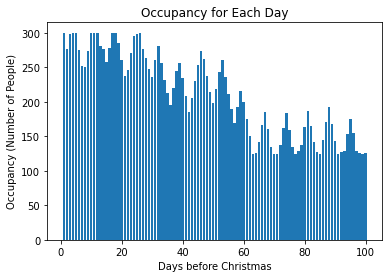

In [39]:
# Plot occupancy for each day

#assigneddayList = list(range(1, n_assignedday+1))
plt.bar(assigneddayList, OccupancyperDay_M3)
plt.title("Occupancy for Each Day")
plt.ylabel("Occupancy (Number of People)") 
plt.xlabel("Days before Christmas") 
plt.show()

In [40]:
# Total Cost Summary

# Total preference cost 
print("Total preference cost:", totPrefCost_M3) # 106186.0

# Total accounting penalty
print("Total accounting penalty:", totAccPenalty_M3)  # 3162.9877796508863

# Total costs (preference cost + accounting penalty)
print("Total costs (preference cost + accounting penalty):", totPrefCost_M3+totAccPenalty_M3) # 109348.98777965088

Total preference cost: 106186.0
Total accounting penalty: 3162.9877796508863
Total costs (preference cost + accounting penalty): 109348.98777965088


## Part F. Appendix - Trial and Error 

### Part F-1: Trial and Error - Minimize both "Preference Cost" and  "Accounting Penalty " using Nonlinear Programs

To try to use nonlinear programming instead, I have tried to use the following code, but it seems that it couldn't find a solution in a fair amount of time.

In [44]:
# # declare a concrete model
# model = ConcreteModel()

# # declare the decision variables: Whether family assigned to that day?
# model.x = Var(range(n_family), range(n_assignedday), domain = Binary) # (n_family * n_assignedday)

# # f refers to the family_id
# # d refers to the assigned day
# # c refers to the choice
# # n_d refers to the current day occupancy
# # n_d1 refers to the previous day occupancy

# # specify the objective: Minimize total costs (preference cost + accounting penalty)

# # Total preference cost
# totPrefCost = sum(model.x[f,d]*prefCost_matrix[f][d] for f in range(n_family) for d in range(n_assignedday)) 

# # Occupancy per assigned day
# OccupancyperDay = []
# for d in range(n_assignedday): # for each assigned day  
#     n_occupancy = sum(model.x[f,d]*n_people[f] for f in range(n_family))
#     OccupancyperDay.append(n_occupancy)
    
# # Accounting penalty
# AccPenalty = []
# for d in range(n_assignedday-1): # for each assigned day1 - day99  (index 0-98)    
#     n_d = OccupancyperDay[d]
#     n_d1 = OccupancyperDay[d+1]
#     accounting_penalty = (n_d-125)/400 * (n_d**(0.5+(abs(n_d-n_d1)/50)))  # accounting penalty equation 
#     AccPenalty.append(accounting_penalty)

# # for the initial condition of d=100, n101=n100 (index 99)
# n_d = OccupancyperDay[n_assignedday-1]
# n_d1 = n_d 
# accounting_penalty = (n_d-125)/400 * (n_d**(0.5+(abs(n_d-n_d1)/50)))  # accounting penalty equation 
# AccPenalty.append(accounting_penalty)   

# # Total accounting penalty
# totAccPenalty = sum(AccPenalty[d] for d in range(n_assignedday))

# # objective: Minimize total costs (preference cost + accounting penalty)
# model.Objective = Objective(expr = totPrefCost + totAccPenalty, sense= minimize) 

# #-------------------------

# # Constraint: Every family must be scheduled for one and only one assigned day
# model.OneAssignedDay =  ConstraintList() 
# for f in range(n_family): # for each family
#     model.OneAssignedDay.add(expr = sum(model.x[f,d] for d in range(n_assignedday)) == 1)

# # Constraint: The total number of people attending the workshop each day must be between 125 - 300

# # lower bound occupancy constraint
# model.OccupancyMin =  ConstraintList() 
# for d in range(n_assignedday): # for each assigned day
#     model.OccupancyMin.add(expr = sum(model.x[f,d]*n_people[f] for f in range(n_family)) >= min_occupancy)

# # upper bound occupancy constraint
# model.OccupancyMax =  ConstraintList() 
# for d in range(n_assignedday): # for each assigned day
#     model.OccupancyMax.add(expr = sum(model.x[f,d]*n_people[f] for f in range(n_family)) <= max_occupancy)

# # specify the solver and solve
# opt = SolverFactory('ipopt')   # nonlinear
# opt.options['max_iter']= 10000000
# opt.options['print_level'] = 12
# results = opt.solve(model, tee = True)    

In [ ]:
# # print the solution

# # Total costs (preference cost + accounting penalty)
# print("Total costs (preference cost + accounting penalty):", model.Objective()) # 

# # save the solution to a dataframe
# sol_allcosts = []
# for f in range(n_family): # for each family
#     familyassigned = []
#     familyassigned.append(f)
#     for d in range(n_assignedday): # for each assigned day
#         if model.x[f,d]() == 1:
#             familyassigned.append(d+1)
#     sol_allcosts.append(familyassigned)
        
# df_allcosts = pd.DataFrame(sol_allcosts, columns = ["family_id","assigned_day"])
# df_allcosts

In [ ]:
# # Total costs (preference cost + accounting penalty) under this solution

# # Total preference cost 
# totPrefCost = sum(model.x[f,d]()*prefCost_matrix[f][d] for f in range(n_family) for d in range(n_assignedday)) 

# # Occupancy per assigned day
# OccupancyperDay = []
# for d in range(n_assignedday): # for each assigned day  
#     n_occupancy = sum(model.x[f,d]()*n_people[f] for f in range(n_family))
#     OccupancyperDay.append(n_occupancy)
    
# # Accounting penalty
# AccPenalty = []
# for d in range(n_assignedday-1): # for each assigned day1 - day99  (index 0-98)    
#     n_d = OccupancyperDay[d]
#     n_d1 = OccupancyperDay[d+1]
#     accounting_penalty = (n_d-125)/400 * (n_d**(0.5+(abs(n_d-n_d1)/50)))  # accounting penalty equation 
#     AccPenalty.append(accounting_penalty)

# # for the initial condition of d=100, n101=n100 (index 99)
# n_d = OccupancyperDay[n_assignedday-1]
# n_d1 = n_d 
# accounting_penalty = (n_d-125)/400 * (n_d**(0.5+(abs(n_d-n_d1)/50)))  # accounting penalty equation 
# AccPenalty.append(accounting_penalty)   

# # Total accounting penalty
# totAccPenalty = sum(AccPenalty[d] for d in range(n_assignedday))

# #------------------------------

# # Plot occupancy for each day

# assigneddayList = list(range(1, n_assignedday+1))
# plt.bar(assigneddayList, OccupancyperDay)
# plt.title("Occupancy for Each Day")
# plt.ylabel("Occupancy (Number of People)") 
# plt.xlabel("Days before Christmas") 
# plt.show()

In [ ]:
# # Total Cost Summary

# # Total preference cost 
# print("Total preference cost:", totPrefCost)  

# # Total accounting penalty
# print("Total accounting penalty:", totAccPenalty)  

# # Total costs (preference cost + accounting penalty)
# print("Total costs (preference cost + accounting penalty):", totPrefCost+totAccPenalty) 

### Part F-2: Trial and Error - "Accounting Penalty" Part

To try to keep it linear, I have tried to use the "occupancy per assigned day" to search back in the "accPenalty_matrix",
but the list indices cannot accept SumExpression of the occupancy per assigned day.

In [ ]:
# # specify the objective: Minimize total costs (preference cost + accounting penalty)

# # Preference cost
# totPrefCost = sum(model.x[f,d]*prefCost_matrix[f][d] for f in range(n_family) for d in range(n_assignedday)) 

# # Occupancy per assigned day
# OccupancyperDay = []
# for d in range(n_assignedday): # for each assigned day  
#     sum_occu = 0
#     for f in range(n_family):
#         sum_occu += model.x[f,d]*n_people[f] 
#     OccupancyperDay.append(sum_occu)
    
# # Accounting penalty
# AccPenalty = []
# for d in range(n_assignedday-1): # for each assigned day1 - day99  (index 0-98)  
#     # accPenalty_matrix[n_d][n_d1], min_occupancy 125 -> index 0
#     n_dIndex = OccupancyperDay[d]-min_occupancy
#     n_d1Index = OccupancyperDay[d+1]-min_occupancy
#     AccPenalty.append(accPenalty_matrix[n_dIndex][n_d1Index])
    
# # for the initial condition of d=100, n101=n100 (index 99)
# n_100Index = OccupancyperDay[n_assignedday-1]-min_occupancy
# AccPenalty.append(accPenalty_matrix[n_100Index][n_100Index])   
    
# totAccPenalty = sum(AccPenalty[d] for d in range(n_assignedday))

# # objective: Minimize total costs (preference cost + accounting penalty)
# model.Objective = Objective(expr = totPrefCost + totAccPenalty, sense= minimize) 

### References

- Data source and problem setting: Kaggle Competition - Santa's Workshop Tour 2019: https://www.kaggle.com/c/santa-workshop-tour-2019/overview
- Code: 
https://www.kaggle.com/inversion/santa-s-2019-starter-notebook ; 
https://www.kaggle.com/c/santa-workshop-tour-2019/discussion/120764